
This Dataset is a a combination of ground data labels collected from Mtwara Region in Tanzania on Cashew Nut trees and non cashew (non cashew trees, shrubs, bushes, and undergrowth/grass)

Date is Clustered to Just September to December 2022


***Objective of Analysis:

*   observe some abnormality
*   shift in seasonality,
*   ndvi, evi trend per cluster of target,
*   find cluster with best correlation
*   (1st analysis, cluster(2nd analysis,(look at correlations), spectral bands
*   indices(ndvi, etc)

In [ ]:
# crop type model- priority
# biomass model to be improved
#

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from PIL import Image
import pandas as pd
import json
import sys
#sys.path.append('/content/drive/MyDrive/mavuno')
#sys.path.append('/content/drive/MyDrive/Colab Notebooks')
#from mavuno.raster import rasterize_polygon
#from mavuno.sentinel2 import open_region_climatology, S2Basic ,BAND_KEYS
#from convolve2d_masked import moving_averages_masked
##from cashew_mask import predict_cashew_mask
#from tree_biomass_map import cashew_tree_biomass_map
#from pandas_profiling import ProfileReport
from datetime import datetime
import warnings
warnings.filterwarnings('ignore') #don't display warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets_Mavuno/Undergrowth/Undergrowths-S2/Crop_classification_March_2023/newala_main_df.csv')
df.head(5)

,Unnamed: 0,B1,B11,B12,B2,B3,B4,B5,B6,B7,...,CLD,SCL,Newala_cluster,datetime,day of year,month,ndvi,target,year,evi
0,1996,0.162700,0.404475,0.300225,0.167375,0.181450,0.183700,0.234450,0.298025,0.330625,...,0.0,4.0,Newala DC 03-03,2022-12-28 07:42:49,362.0,12.0,0.322578,1.0,2022.0,0.403818
1,1997,0.166525,0.414175,0.296125,0.155900,0.179575,0.181125,0.237975,0.308050,0.334950,...,0.0,4.0,Newala DC 03-03,2022-10-04 07:42:57,277.0,10.0,0.349933,1.0,2022.0,0.441401
2,1998,0.166500,0.442875,0.320175,0.158100,0.181550,0.184575,0.242475,0.309400,0.340875,...,0.0,4.0,Newala DC 03-03,2022-10-14 07:42:54,287.0,10.0,0.349745,1.0,2022.0,0.448695
3,1999,0.172375,0.494025,0.361550,0.172100,0.194550,0.197350,0.264400,0.336900,0.377450,...,0.0,4.0,Newala DC 03-03,2022-10-19 07:42:49,292.0,10.0,0.362950,1.0,2022.0,0.499190
4,2000,0.171300,0.482700,0.350025,0.167950,0.192775,0.209100,0.266000,0.322000,0.350825,...,0.0,4.0,Newala DC 03-03,2022-10-24 07:42:53,297.0,10.0,0.315744,1.0,2022.0,0.443244


In [ ]:
#df['polygon_cluster'] = df['cluster'].str.replace(r'\D+', '')

In [ ]:
df.head()

,Unnamed: 0,B1,B11,B12,B2,B3,B4,B5,B6,B7,...,CLD,SCL,Newala_cluster,datetime,day of year,month,ndvi,target,year,evi
0,1996,0.162700,0.404475,0.300225,0.167375,0.181450,0.183700,0.234450,0.298025,0.330625,...,0.0,4.0,Newala DC 03-03,2022-12-28 07:42:49,362.0,12.0,0.322578,1.0,2022.0,0.403818
1,1997,0.166525,0.414175,0.296125,0.155900,0.179575,0.181125,0.237975,0.308050,0.334950,...,0.0,4.0,Newala DC 03-03,2022-10-04 07:42:57,277.0,10.0,0.349933,1.0,2022.0,0.441401
2,1998,0.166500,0.442875,0.320175,0.158100,0.181550,0.184575,0.242475,0.309400,0.340875,...,0.0,4.0,Newala DC 03-03,2022-10-14 07:42:54,287.0,10.0,0.349745,1.0,2022.0,0.448695
3,1999,0.172375,0.494025,0.361550,0.172100,0.194550,0.197350,0.264400,0.336900,0.377450,...,0.0,4.0,Newala DC 03-03,2022-10-19 07:42:49,292.0,10.0,0.362950,1.0,2022.0,0.499190
4,2000,0.171300,0.482700,0.350025,0.167950,0.192775,0.209100,0.266000,0.322000,0.350825,...,0.0,4.0,Newala DC 03-03,2022-10-24 07:42:53,297.0,10.0,0.315744,1.0,2022.0,0.443244


In [ ]:
#data_1=df

In [ ]:
#data_1 = data_1.melt(data=data_1,
   #                  id_vars=['datatime'],
                 #  value_name='cluster_1',
                   #value_vars=["Mtwara DC 01-11", "Mtwara DC 01-12", "Mtwara DC 02-09", "Mtwara DC 02-09(max_cc=10)",
                              # "Mtwara DC 02-10", "Mtwara DC 03-08", "Mtwara DC 03-10", "Mtwara DC 03-14", "Mtwara DC 04-13",
                              # "Mtwara DC 04-14", "Mtwara DC 05-14",
                              # "Mtwara MC 02-13"])



In [ ]:
#trees_df = trees_df.drop(['Unnamed: 0'], axis=1)

In [ ]:
trees_df = df

In [ ]:
trees_df.columns

Index(['Unnamed: 0', 'B1', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7',
       'B8', 'B8A', 'B9', 'CLD', 'SCL', 'Newala_cluster', 'datetime',
       'day of year', 'month', 'ndvi', 'target', 'year', 'evi'],
      dtype='object')

In [ ]:
# relieve noisy columns
trees_df = trees_df.drop(['Unnamed: 0', 'SCL', 'CLD'], axis=1)

In [ ]:
# dropping any duplicates
trees_df = trees_df.drop_duplicates()

In [ ]:
trees_df['evi'] = 2.5*(trees_df.B8A - trees_df.B4)/(trees_df.B8A + (6*trees_df.B4) - (7.5*trees_df.B4) +1)
trees_df['ndvi'] = (trees_df.B8A - trees_df.B4) /  (trees_df.B8A + trees_df.B4)

In [ ]:
#trees_df.rename({'undergrowth_type_map':'undergrowth_type', 'undergrowth_height_map':'undergrowth_height', 'undergrowth_type_map_ma':'undergrowth_type_ma', 'undergrowth_height_map_ma':'undergrowth_height_ma', 'cashew_mask_ma': 'cashew_ma' }, axis=1, inplace=True)
print(trees_df.columns)

Index(['B1', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A',
       'B9', 'Newala_cluster', 'datetime', 'day of year', 'month', 'ndvi',
       'target', 'year', 'evi'],
      dtype='object')


In [ ]:
trees_df.head(2)

,B1,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,Newala_cluster,datetime,day of year,month,ndvi,target,year,evi
0,0.162700,0.404475,0.300225,0.167375,0.181450,0.183700,0.234450,0.298025,0.330625,0.331325,0.358650,0.369000,Newala DC 03-03,2022-12-28 07:42:49,362.0,12.0,0.322578,1.0,2022.0,0.403818
1,0.166525,0.414175,0.296125,0.155900,0.179575,0.181125,0.237975,0.308050,0.334950,0.356825,0.376125,0.353075,Newala DC 03-03,2022-10-04 07:42:57,277.0,10.0,0.349933,1.0,2022.0,0.441401


In [ ]:
trees_df.head(5)

,B1,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,Newala_cluster,datetime,day of year,month,ndvi,target,year,evi
0,0.162700,0.404475,0.300225,0.167375,0.181450,0.183700,0.234450,0.298025,0.330625,0.331325,0.358650,0.369000,Newala DC 03-03,2022-12-28 07:42:49,362.0,12.0,0.322578,1.0,2022.0,0.403818
1,0.166525,0.414175,0.296125,0.155900,0.179575,0.181125,0.237975,0.308050,0.334950,0.356825,0.376125,0.353075,Newala DC 03-03,2022-10-04 07:42:57,277.0,10.0,0.349933,1.0,2022.0,0.441401
2,0.166500,0.442875,0.320175,0.158100,0.181550,0.184575,0.242475,0.309400,0.340875,0.366050,0.383125,0.384525,Newala DC 03-03,2022-10-14 07:42:54,287.0,10.0,0.349745,1.0,2022.0,0.448695
3,0.172375,0.494025,0.361550,0.172100,0.194550,0.197350,0.264400,0.336900,0.377450,0.402100,0.422225,0.424425,Newala DC 03-03,2022-10-19 07:42:49,292.0,10.0,0.362950,1.0,2022.0,0.499190
4,0.171300,0.482700,0.350025,0.167950,0.192775,0.209100,0.266000,0.322000,0.350825,0.377975,0.402075,0.403650,Newala DC 03-03,2022-10-24 07:42:53,297.0,10.0,0.315744,1.0,2022.0,0.443244


In [ ]:
trees_df['evi'] = 2.5*(trees_df.B8A - trees_df.B4)/(trees_df.B8A + (6*trees_df.B4) - (7.5*trees_df.B4) +1)
trees_df['ndvi'] = (trees_df.B8A - trees_df.B4) /  (trees_df.B8A + trees_df.B4)

In [ ]:
trees_df.head(5)

,B1,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,Newala_cluster,datetime,day of year,month,ndvi,target,year,evi
0,0.162700,0.404475,0.300225,0.167375,0.181450,0.183700,0.234450,0.298025,0.330625,0.331325,0.358650,0.369000,Newala DC 03-03,2022-12-28 07:42:49,362.0,12.0,0.322578,1.0,2022.0,0.403818
1,0.166525,0.414175,0.296125,0.155900,0.179575,0.181125,0.237975,0.308050,0.334950,0.356825,0.376125,0.353075,Newala DC 03-03,2022-10-04 07:42:57,277.0,10.0,0.349933,1.0,2022.0,0.441401
2,0.166500,0.442875,0.320175,0.158100,0.181550,0.184575,0.242475,0.309400,0.340875,0.366050,0.383125,0.384525,Newala DC 03-03,2022-10-14 07:42:54,287.0,10.0,0.349745,1.0,2022.0,0.448695
3,0.172375,0.494025,0.361550,0.172100,0.194550,0.197350,0.264400,0.336900,0.377450,0.402100,0.422225,0.424425,Newala DC 03-03,2022-10-19 07:42:49,292.0,10.0,0.362950,1.0,2022.0,0.499190
4,0.171300,0.482700,0.350025,0.167950,0.192775,0.209100,0.266000,0.322000,0.350825,0.377975,0.402075,0.403650,Newala DC 03-03,2022-10-24 07:42:53,297.0,10.0,0.315744,1.0,2022.0,0.443244


In [ ]:
trees_df.shape

(4232, 20)

In [ ]:
trees_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4232 entries, 0 to 4231
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   B1              4232 non-null   float64
 1   B11             4232 non-null   float64
 2   B12             4232 non-null   float64
 3   B2              4232 non-null   float64
 4   B3              4232 non-null   float64
 5   B4              4232 non-null   float64
 6   B5              4232 non-null   float64
 7   B6              4232 non-null   float64
 8   B7              4232 non-null   float64
 9   B8              4232 non-null   float64
 10  B8A             4232 non-null   float64
 11  B9              4232 non-null   float64
 12  Newala_cluster  4232 non-null   object 
 13  datetime        4232 non-null   object 
 14  day of year     4232 non-null   float64
 15  month           4232 non-null   float64
 16  ndvi            4232 non-null   float64
 17  target          4232 non-null   f

In [ ]:
trees_df.describe().T

,count,mean,std,min,25%,50%,75%,max
B1,4232.0,0.162631,0.024894,0.000000,0.152575,0.163062,0.172350,0.290375
B11,4232.0,0.404474,0.053103,0.000000,0.374625,0.404475,0.437006,0.590000
B12,4232.0,0.298140,0.044715,0.143800,0.265750,0.295287,0.328806,0.627075
B2,4232.0,0.162858,0.017761,0.000000,0.152500,0.161000,0.171531,0.232425
B3,4232.0,0.183604,0.024249,0.000000,0.173300,0.182150,0.194531,0.272700
B4,4232.0,0.188436,0.023338,0.117075,0.171250,0.185625,0.202975,0.304900
B5,4232.0,0.245159,0.024413,0.134175,0.227850,0.242125,0.260500,0.343000
B6,4232.0,0.332620,0.039239,0.173125,0.304325,0.328762,0.356231,0.486975
B7,4232.0,0.368156,0.044336,0.189600,0.336194,0.363175,0.394238,0.548700
B8,4232.0,0.383624,0.045300,0.186925,0.352744,0.379437,0.410006,0.582975


In [ ]:
# Correlations


In [ ]:
# The Correlations
pearsoncorr =trees_df.corr(method='pearson')
pearsoncorr

,B1,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,day of year,month,ndvi,target,year,evi
B1,1.000000,0.298938,0.315126,0.701452,0.807376,0.387016,0.433883,0.293768,0.278213,0.266595,0.287460,0.288690,-0.002519,0.018941,-0.122866,0.170014,NaN,0.115718
B11,0.298938,1.000000,0.809625,0.488375,0.461233,0.744172,0.752390,0.420560,0.386418,0.386535,0.390912,0.347869,0.076407,0.058086,-0.366140,0.279816,NaN,0.052540
B12,0.315126,0.809625,1.000000,0.524181,0.516384,0.850721,0.829046,0.381596,0.322462,0.306307,0.272153,0.194096,0.230011,0.215303,-0.566044,0.395355,NaN,-0.129897
B2,0.701452,0.488375,0.524181,1.000000,0.593490,0.695975,0.668063,0.420315,0.396063,0.365451,0.394914,0.404960,-0.022589,-0.034422,-0.314952,0.179821,NaN,0.077824
B3,0.807376,0.461233,0.516384,0.593490,1.000000,0.609248,0.641193,0.450837,0.425181,0.412849,0.413675,0.373596,0.088450,0.096280,-0.218009,0.196741,NaN,0.139720
B4,0.387016,0.744172,0.850721,0.695975,0.609248,1.000000,0.886050,0.439053,0.378872,0.346124,0.357176,0.335720,0.029620,0.025524,-0.624537,0.293701,NaN,-0.111649
B5,0.433883,0.752390,0.829046,0.668063,0.641193,0.886050,1.000000,0.721883,0.670105,0.646674,0.648826,0.568550,0.079700,0.062105,-0.278974,0.356600,NaN,0.255221
B6,0.293768,0.420560,0.381596,0.420315,0.450837,0.439053,0.721883,1.000000,0.990205,0.960818,0.962295,0.856858,-0.083491,-0.101665,0.392200,0.281669,NaN,0.804590
B7,0.278213,0.386418,0.322462,0.396063,0.425181,0.378872,0.670105,0.990205,1.000000,0.971943,0.979589,0.876446,-0.092243,-0.116744,0.461846,0.234627,NaN,0.852470
B8,0.266595,0.386535,0.306307,0.365451,0.412849,0.346124,0.646674,0.960818,0.971943,1.000000,0.967203,0.847930,-0.120664,-0.140918,0.482222,0.206167,NaN,0.856458


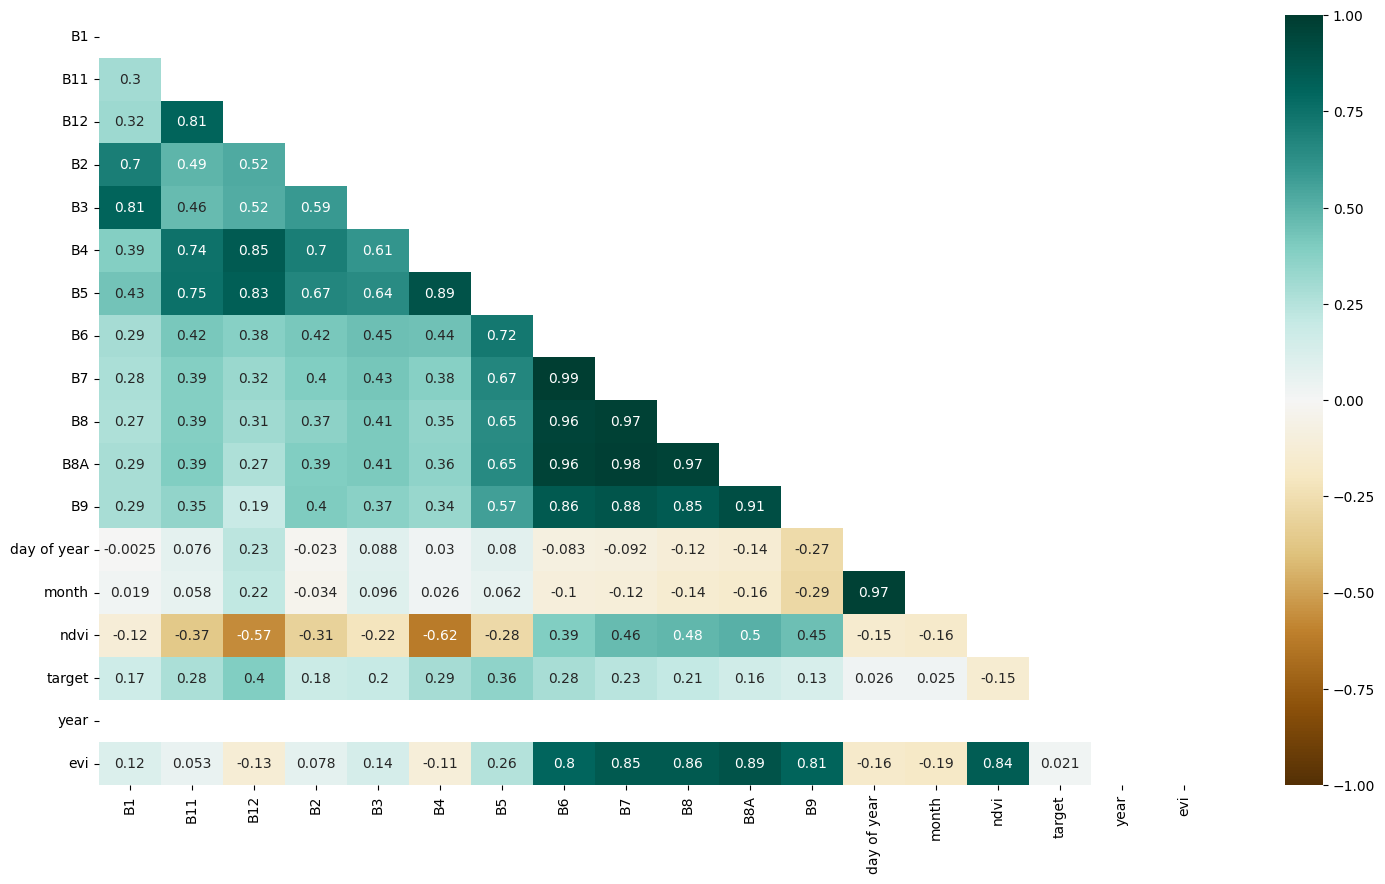

In [ ]:

plt.figure(figsize=(18, 10))
mask = np.triu(np.ones_like(trees_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(trees_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [ ]:
# find the maximum of each column
maxValues = trees_df.max()

print(maxValues)

B1                           0.290375
B11                              0.59
B12                          0.627075
B2                           0.232425
B3                             0.2727
B4                             0.3049
B5                              0.343
B6                           0.486975
B7                             0.5487
B8                           0.582975
B8A                          0.585825
B9                           0.545875
Newala_cluster        Newala TC 09-03
datetime          2022-12-28 07:42:49
day of year                     362.0
month                            12.0
ndvi                         0.537499
target                            1.0
year                           2022.0
evi                          0.764231
dtype: object


In [ ]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(trees_df, .9)

B8A          B9       0.912196
B6           B8       0.960818
             B8A      0.962295
B8           B8A      0.967203
day of year  month    0.968836
B7           B8       0.971943
             B8A      0.979589
B6           B7       0.990205
B1           B1            NaN
dtype: float64

In [ ]:
# looking for date with most value counts

In [ ]:
trees_df['datetime'].value_counts()

2022-09-14 07:43:00    404
2022-11-13 07:42:53    385
2022-10-14 07:42:54    298
2022-11-08 07:42:49    297
2022-09-04 07:43:02    294
2022-11-28 07:42:49    284
2022-10-19 07:42:49    277
2022-12-18 07:42:49    269
2022-12-03 07:42:50    232
2022-10-29 07:42:49    229
2022-10-24 07:42:53    180
2022-10-04 07:42:57    180
2022-10-09 07:42:48    164
2022-12-28 07:42:49    154
2022-09-19 07:42:52    153
2022-09-24 07:42:57    110
2022-12-13 07:42:50     93
2022-11-23 07:42:50     88
2022-12-08 07:42:46     43
2022-11-03 07:42:54     39
2022-11-18 07:42:50     36
2022-09-29 07:42:50     23
Name: datetime, dtype: int64

In [ ]:
trees_df.isna().sum()

B1                0
B11               0
B12               0
B2                0
B3                0
B4                0
B5                0
B6                0
B7                0
B8                0
B8A               0
B9                0
Newala_cluster    0
datetime          0
day of year       0
month             0
ndvi              0
target            0
year              0
evi               0
dtype: int64

<AxesSubplot: >

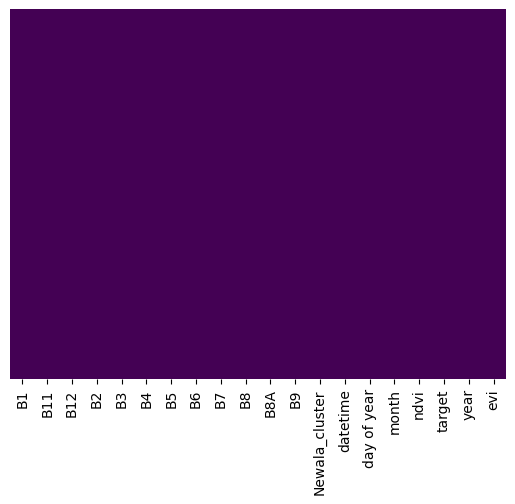

In [ ]:
sns.heatmap(trees_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [ ]:
from scipy.stats import skew

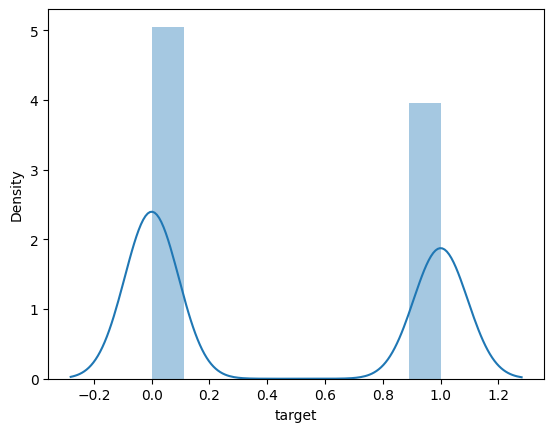

In [ ]:
sns.distplot(trees_df['target'])
plt.show()

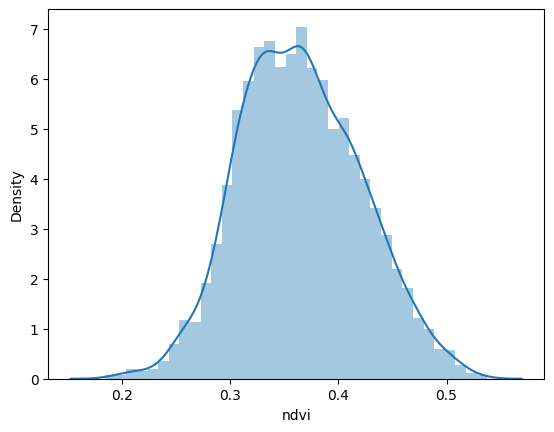

In [ ]:
sns.distplot(trees_df['ndvi'])
plt.show()

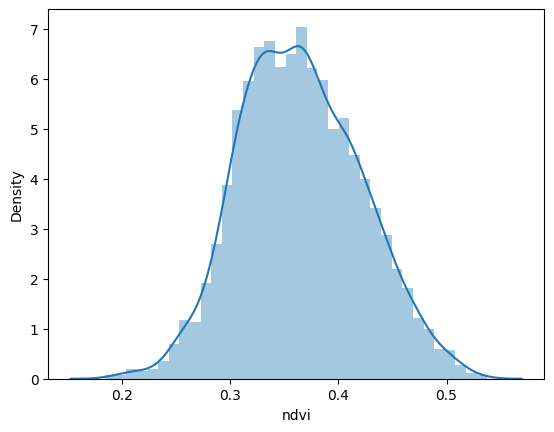

In [ ]:
sns.distplot(trees_df['ndvi'])
plt.show()

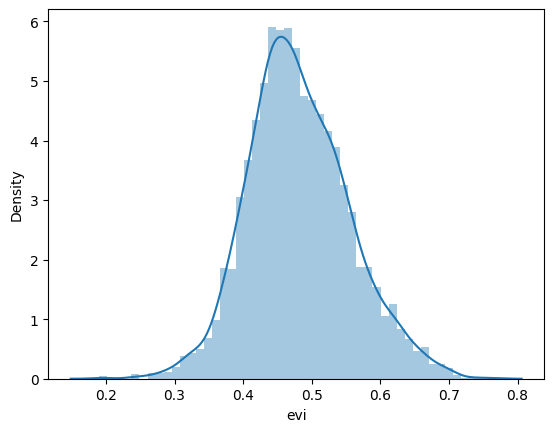

In [ ]:
sns.distplot(trees_df['evi'])
plt.show()

Text(0, 0.5, 'target')

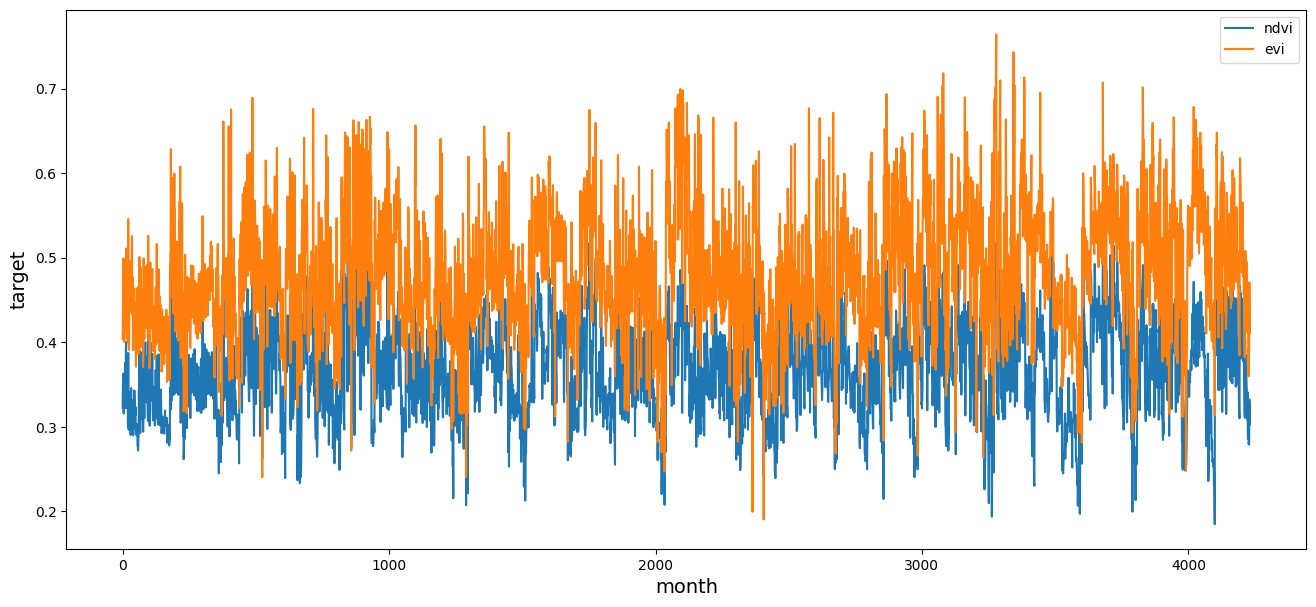

In [ ]:
fig, ax = plt.subplots(figsize = (16, 7))
# Add y-values
ax.plot("ndvi", data = trees_df, label = "ndvi")
ax.plot("evi", data = trees_df, label = "evi")
#ax.plot("month", data = trees_df, label = "month")
# Add y-values
#ax.plot("dbh", data = df, label = "dbh")
# Add legend
ax.legend()
#ax.set(title=' Biomass of Mango, Cashew and Palm trees by circumference at Breast Height')
# Add axis labels
ax.set_xlabel("month", size = 14)
ax.set_ylabel("target", size = 14)


[Text(0.5, 1.0, 'NDVI sequence of Cashew and non Cashew for Newala Region in 2022')]

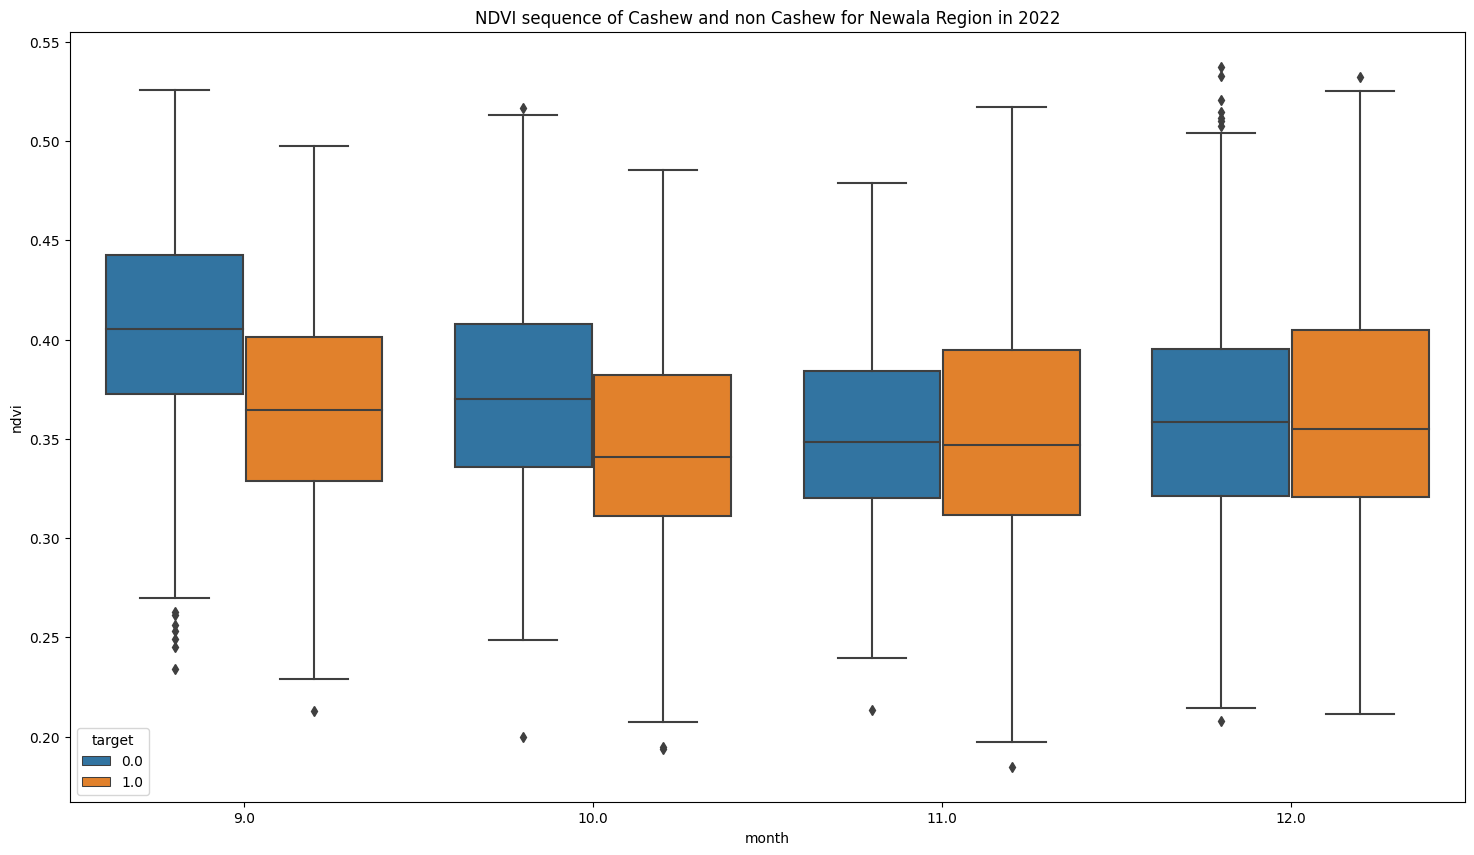

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="ndvi", hue="target").set(title='NDVI sequence of Cashew and non Cashew for Newala Region in 2022')

[Text(0.5, 1.0, 'EVI sequence of Cashew and non Cashew for Newala Region in 2022')]

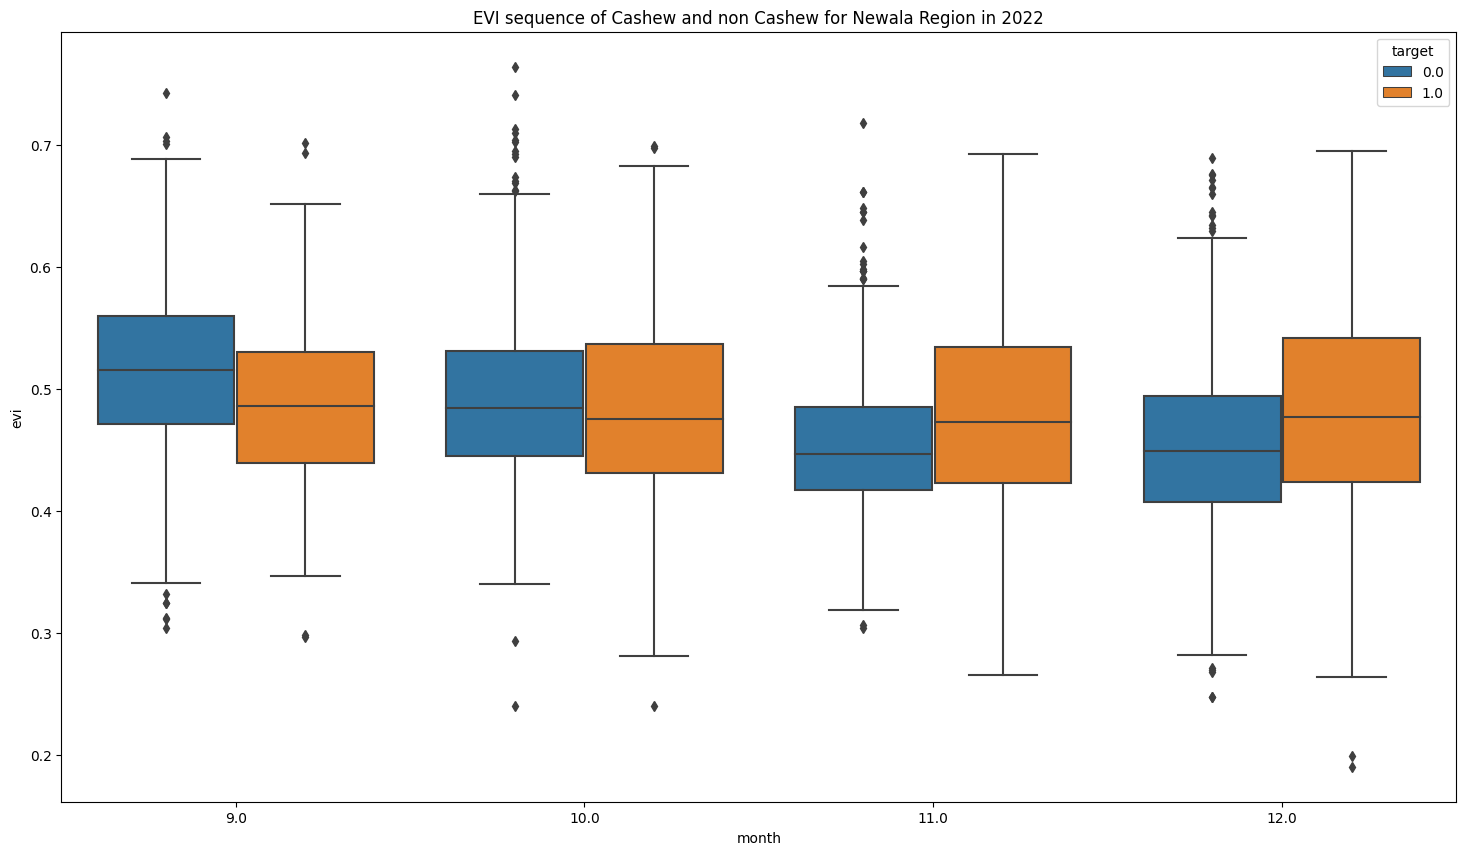

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="evi", hue="target").set(title='EVI sequence of Cashew and non Cashew for Newala Region in 2022')

[Text(0.5, 1.0, 'NDVI against B4 for Newala Region in 2022')]

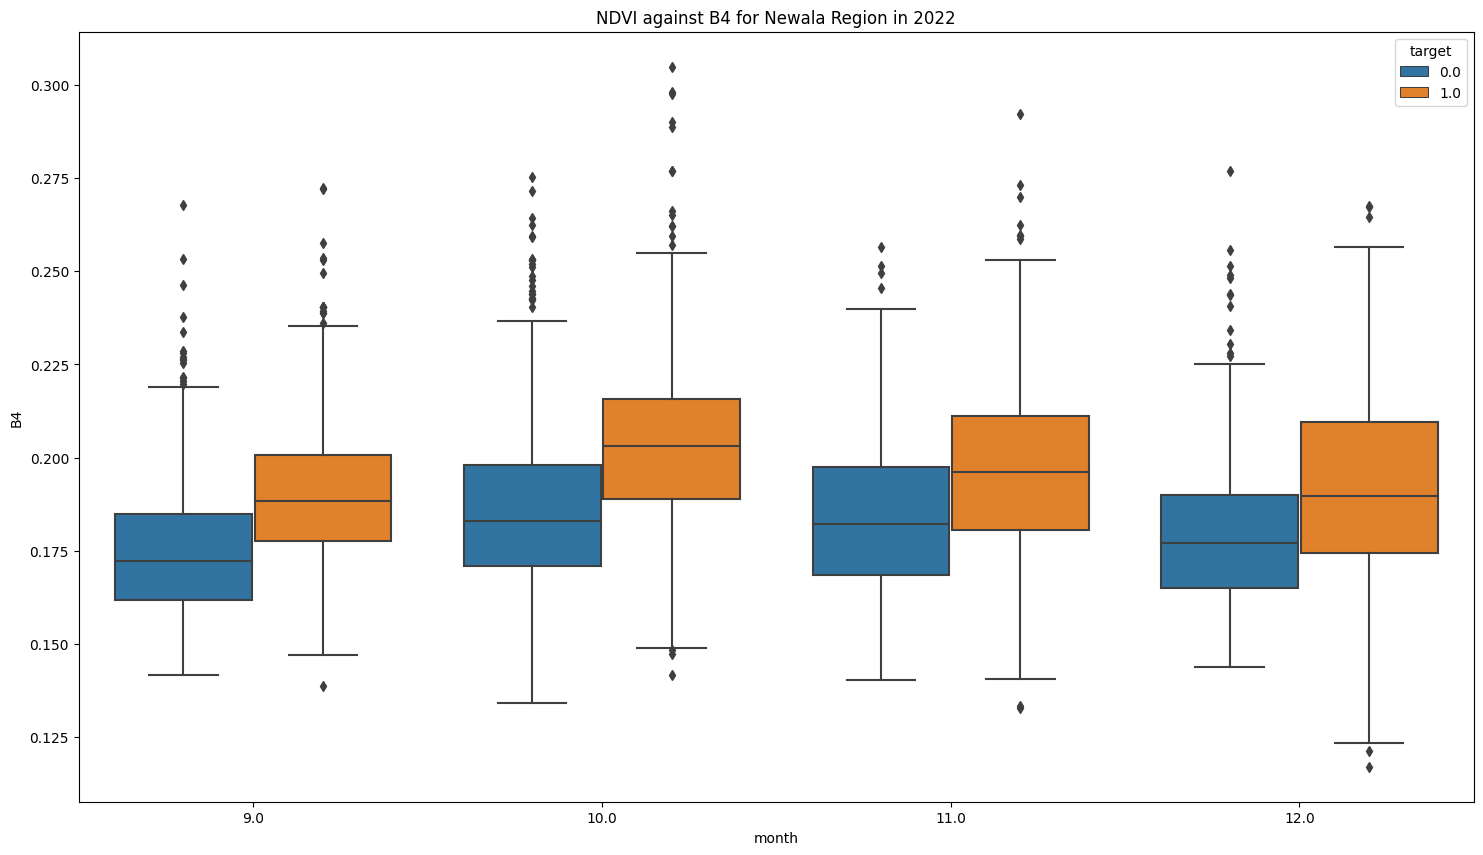

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B4", hue="target").set(title='NDVI against B4 for Newala Region in 2022')

[Text(0.5, 1.0, 'NDVI against B5 for Newala Region in 2022')]

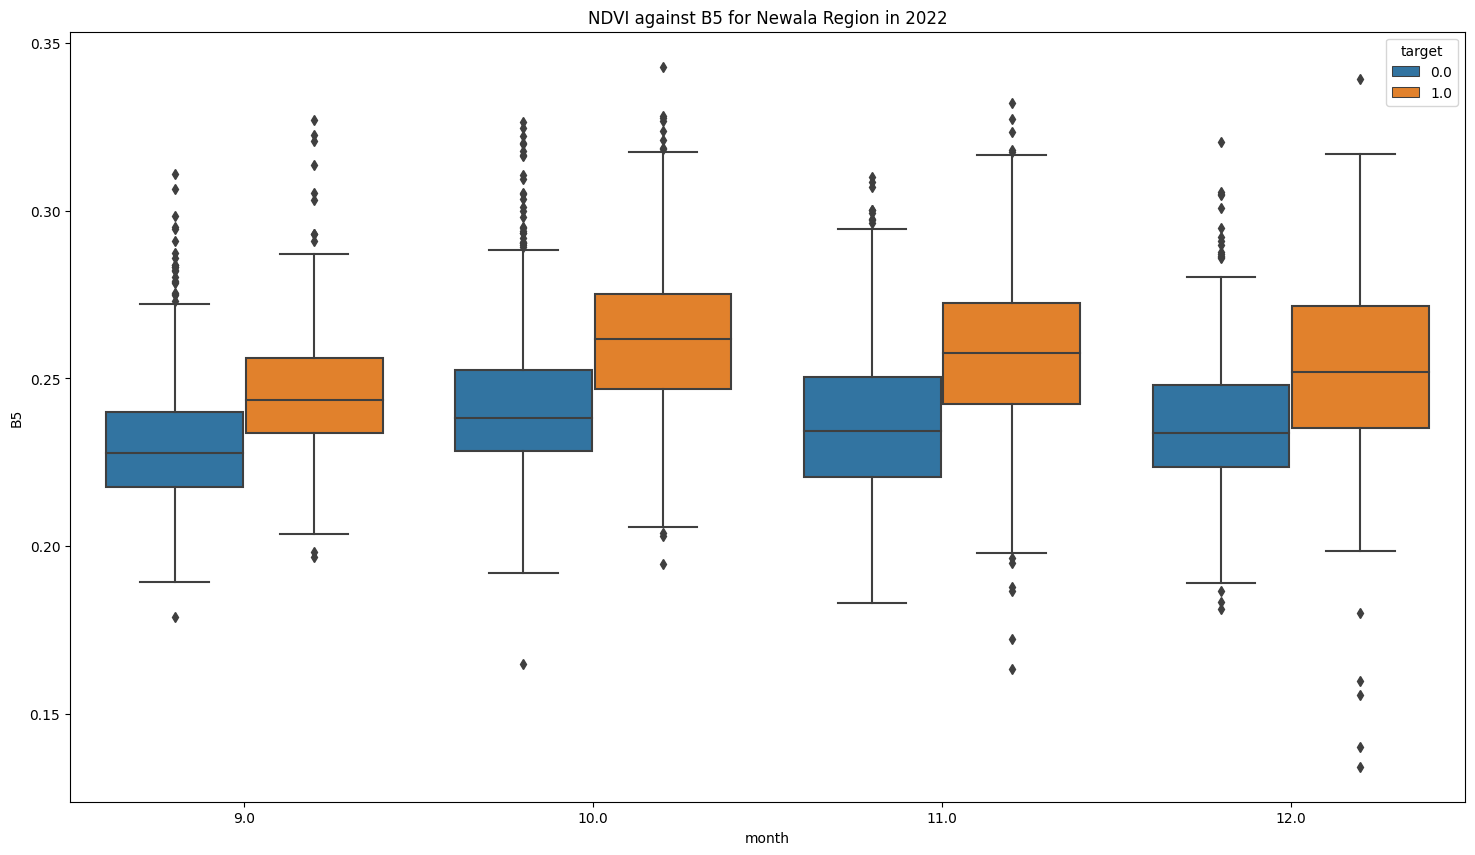

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B5", hue="target").set(title='NDVI against B5 for Newala Region in 2022')

[Text(0.5, 1.0, 'NDVI against B6 for Newala Region in 2022')]

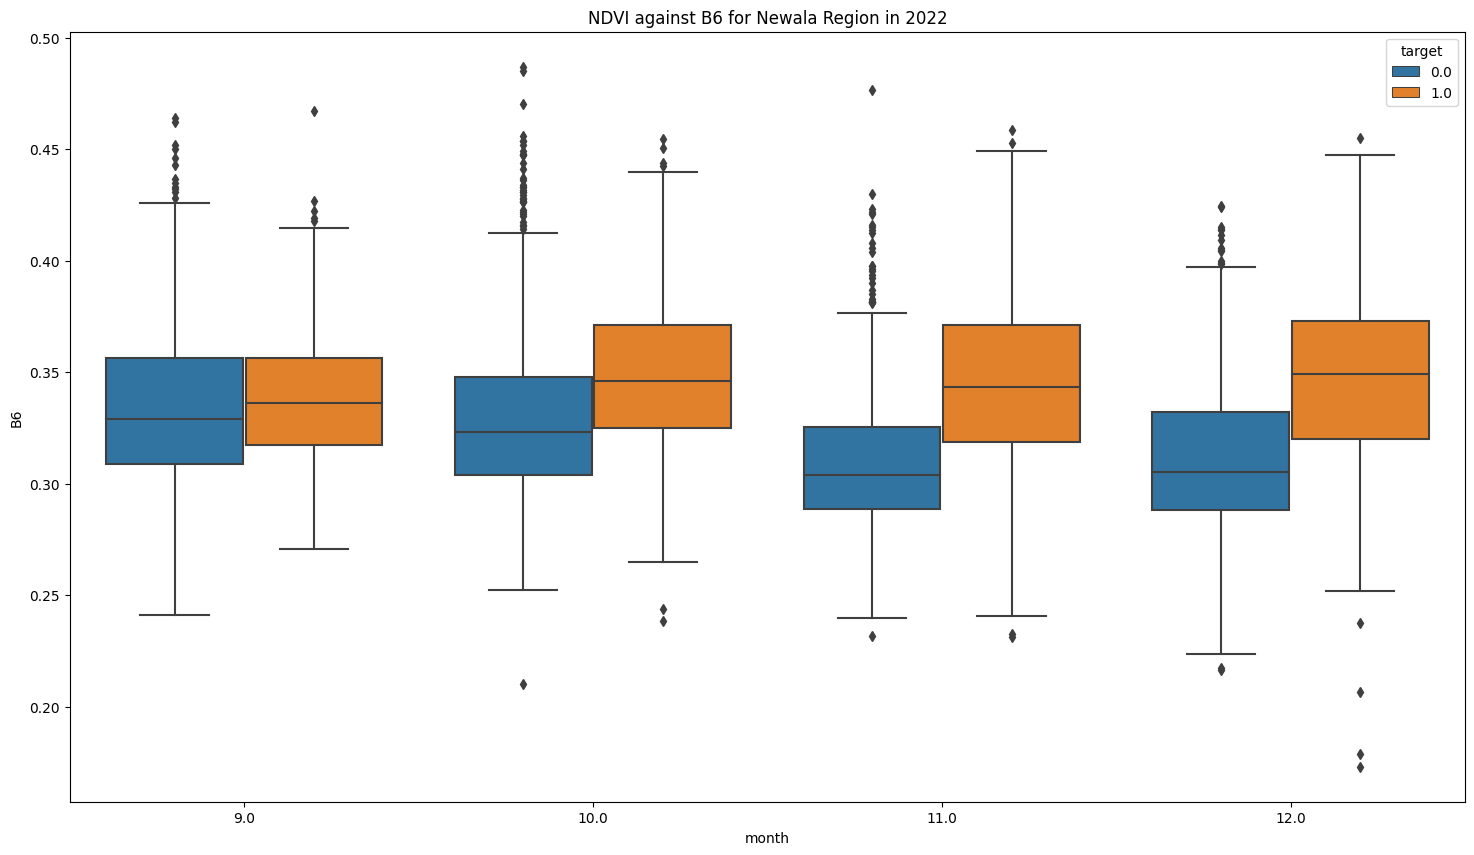

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B6", hue="target").set(title='NDVI against B6 for Newala Region in 2022')

[Text(0.5, 1.0, 'NDVI against B7 for Newala Region in 2022')]

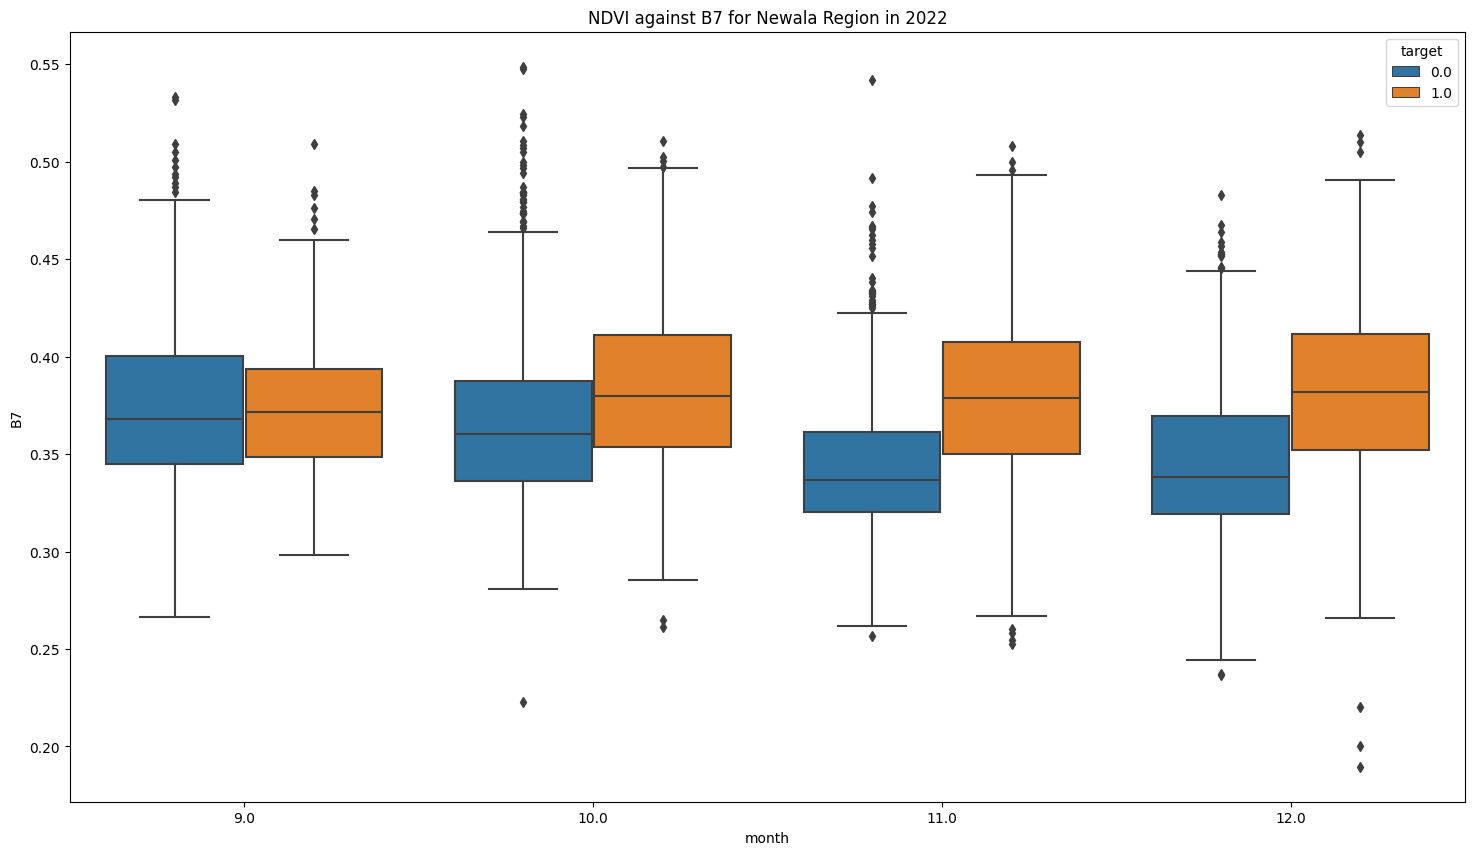

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B7", hue="target").set(title='NDVI against B7 for Newala Region in 2022')

[Text(0.5, 1.0, 'NDVI against B8 for Newala Region in 2022')]

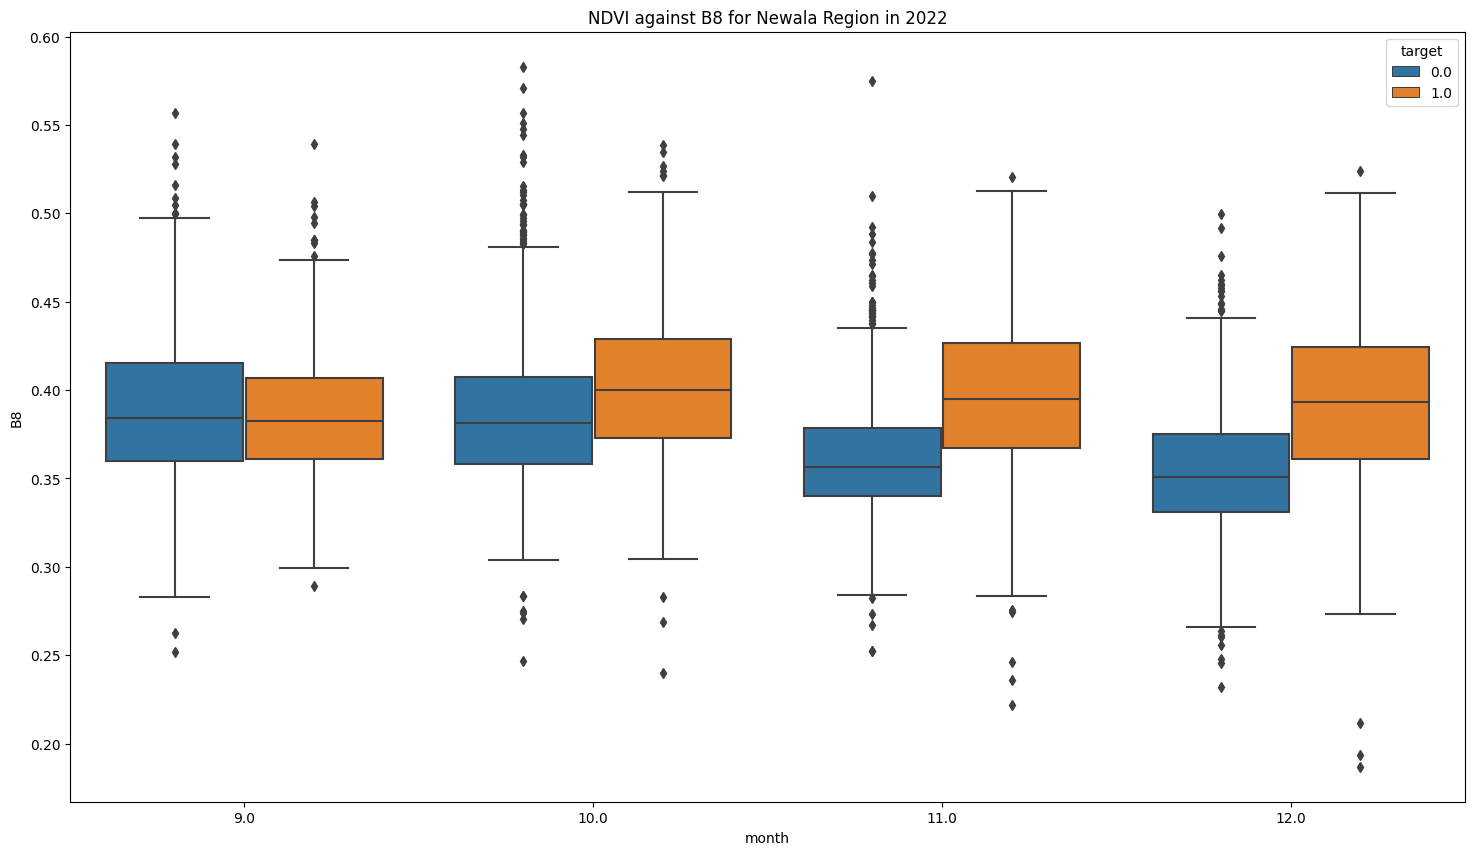

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B8", hue="target").set(title='NDVI against B8 for Newala Region in 2022')

[Text(0.5, 1.0, 'NDVI against B8A for Newala Region in 2022')]

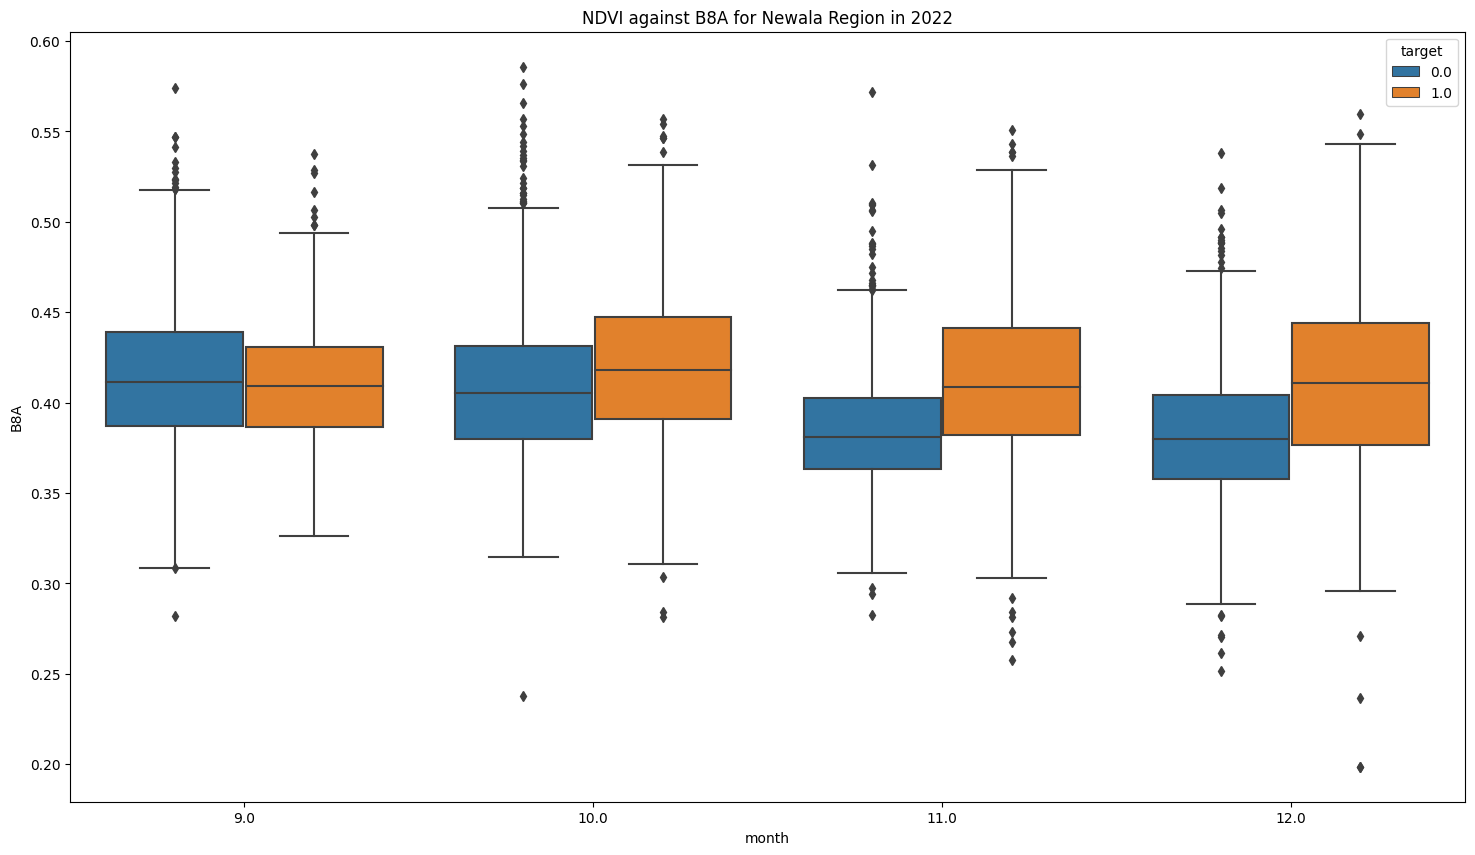

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B8A", hue="target").set(title='NDVI against B8A for Newala Region in 2022')

[Text(0.5, 1.0, 'NDVI against B9 for Newala Region in 2022')]

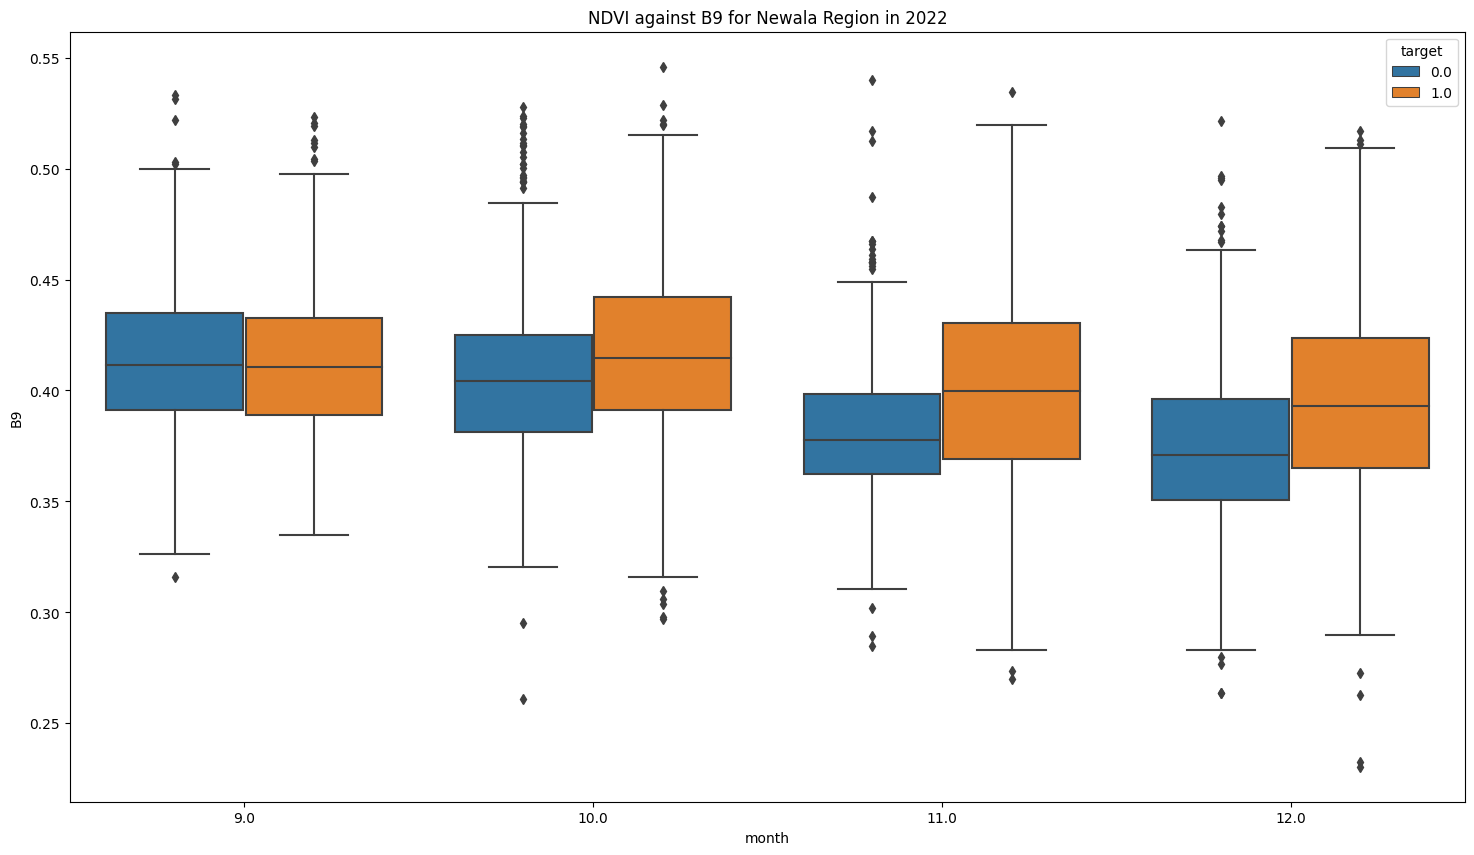

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B9", hue="target").set(title='NDVI against B9 for Newala Region in 2022')

[Text(0.5, 1.0, 'NDVI against B11 for Nanyamba Region in 2022')]

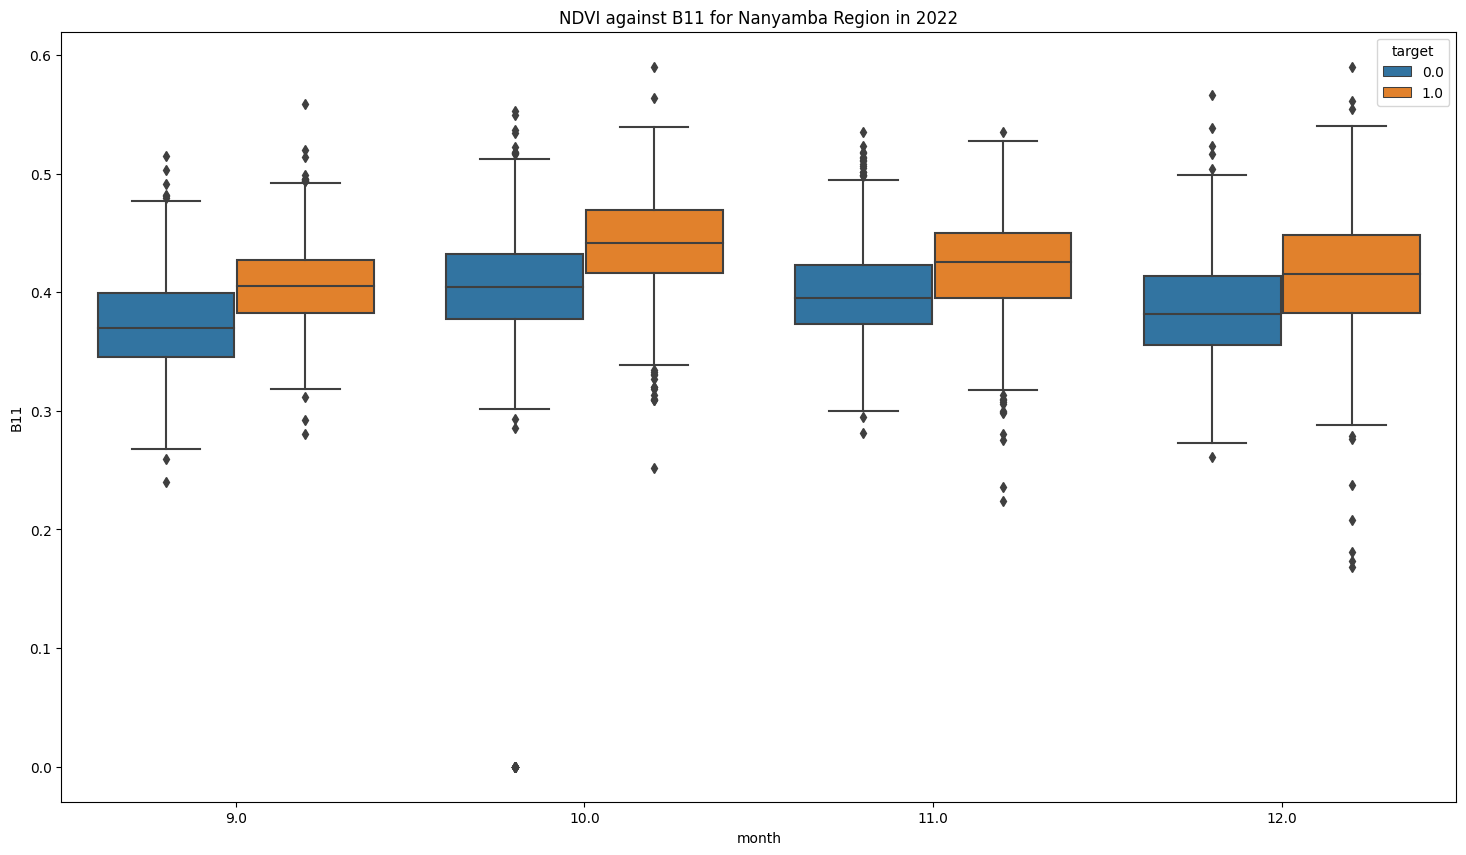

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B11", hue="target").set(title='NDVI against B11 for Nanyamba Region in 2022')

[Text(0.5, 1.0, 'NDVI against B12 for Newala Region in 2022')]

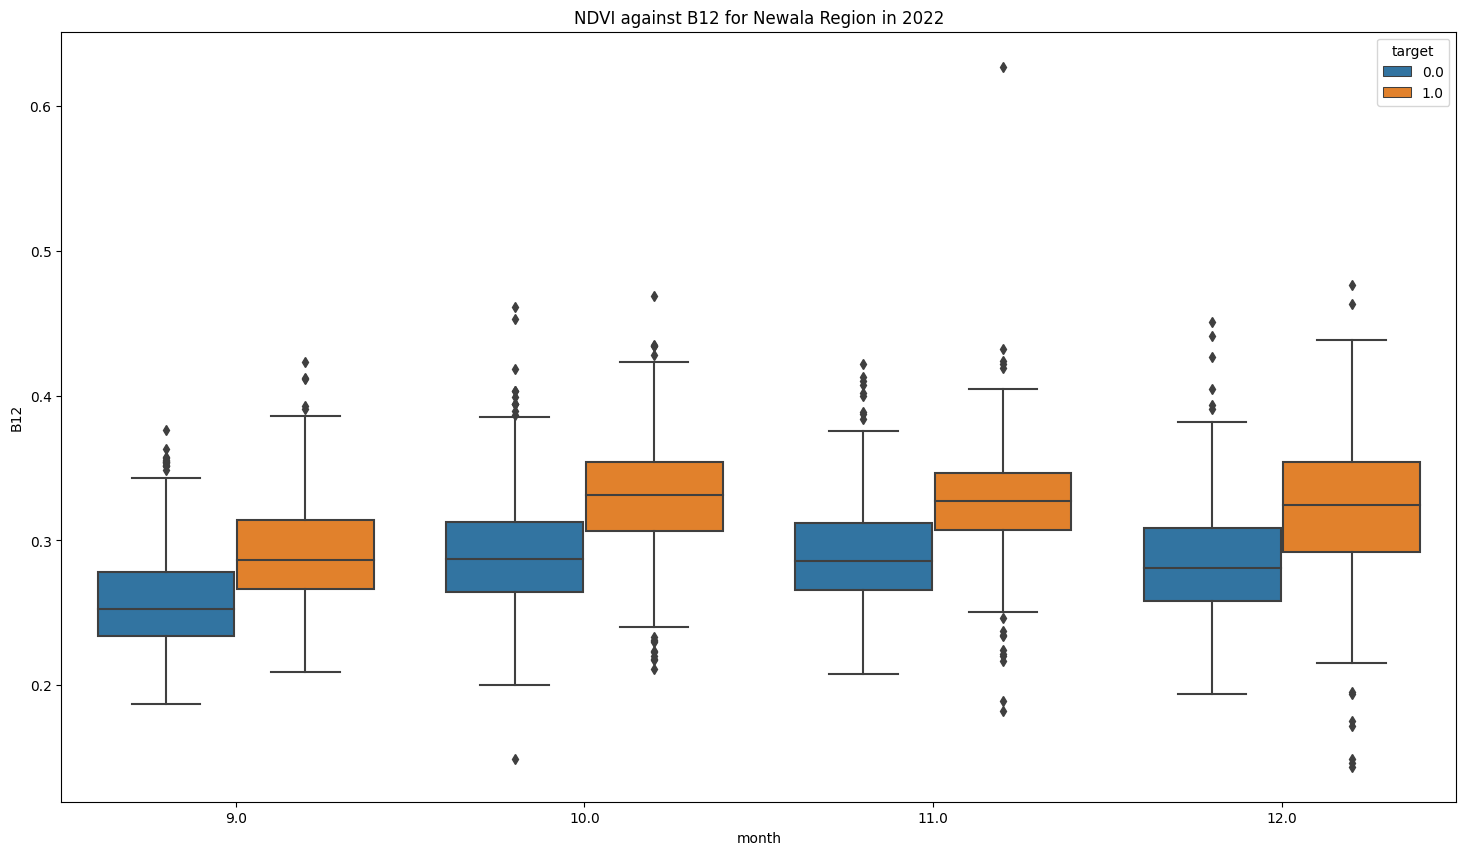

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B12", hue="target").set(title='NDVI against B12 for Newala Region in 2022')

[Text(0.5, 1.0, 'NDVI against B4 for Newala Region in 2022')]

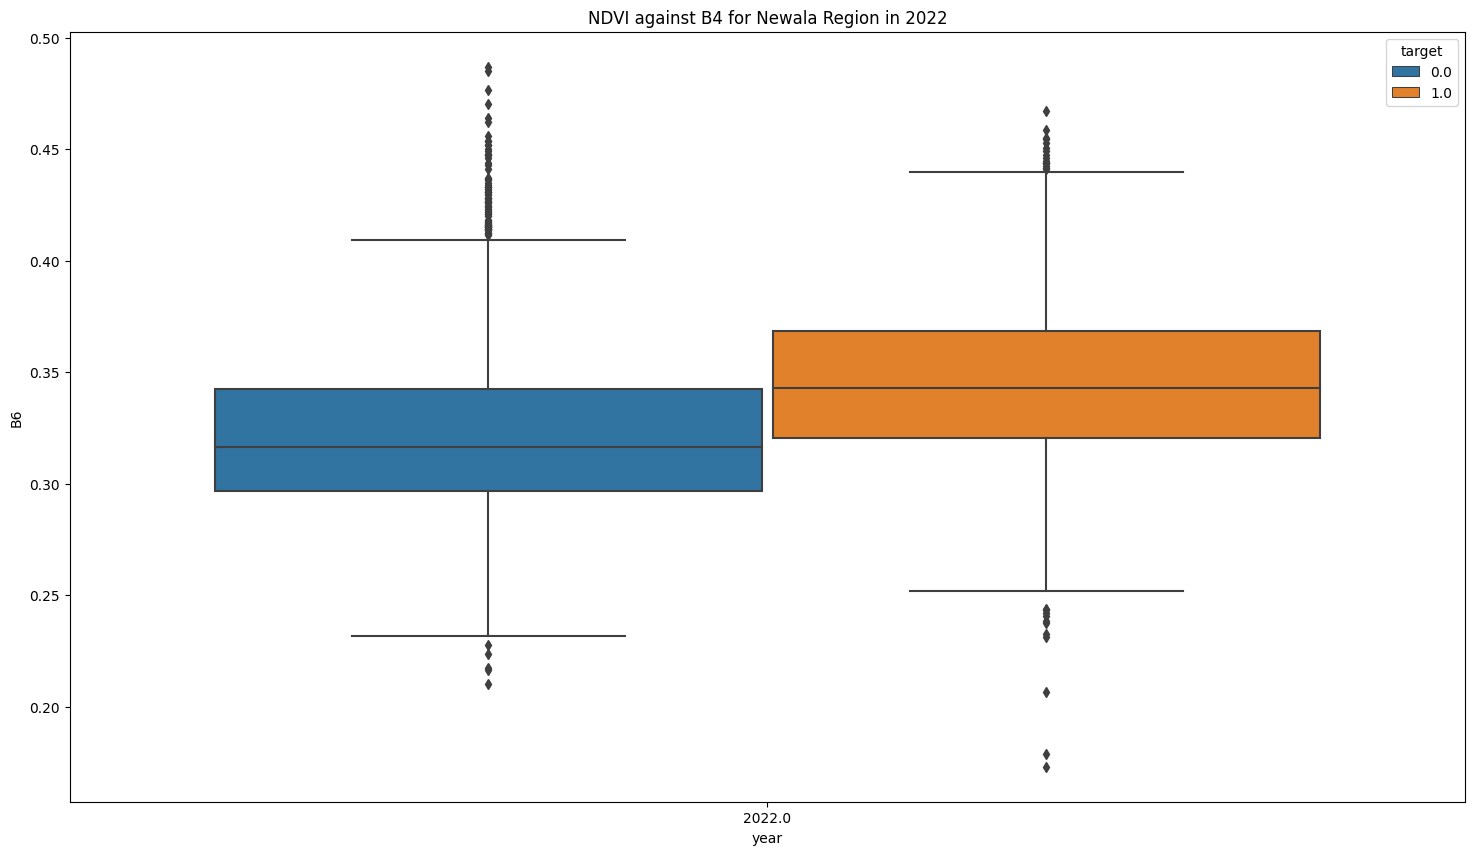

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="year", y="B6", hue="target").set(title='NDVI against B4 for Newala Region in 2022')

[Text(0.5, 1.0, 'NDVI for Newala Region Clusters in 2022')]

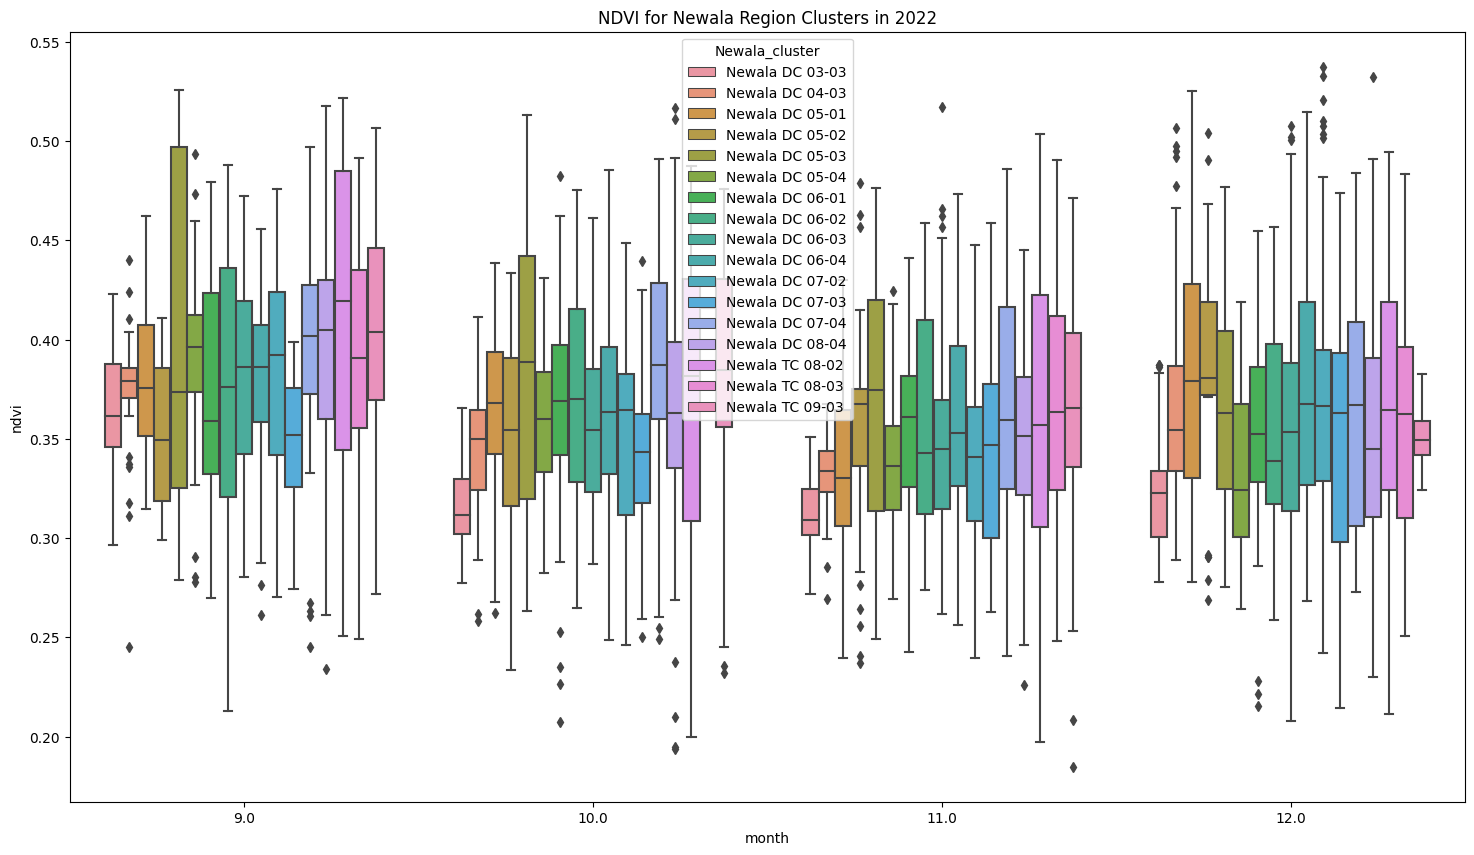

In [ ]:
#
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="ndvi", hue="Newala_cluster").set(title='NDVI for Newala Region Clusters in 2022')

[Text(0.5, 1.0, 'NDVI for Newala Region Clusters in 2022')]

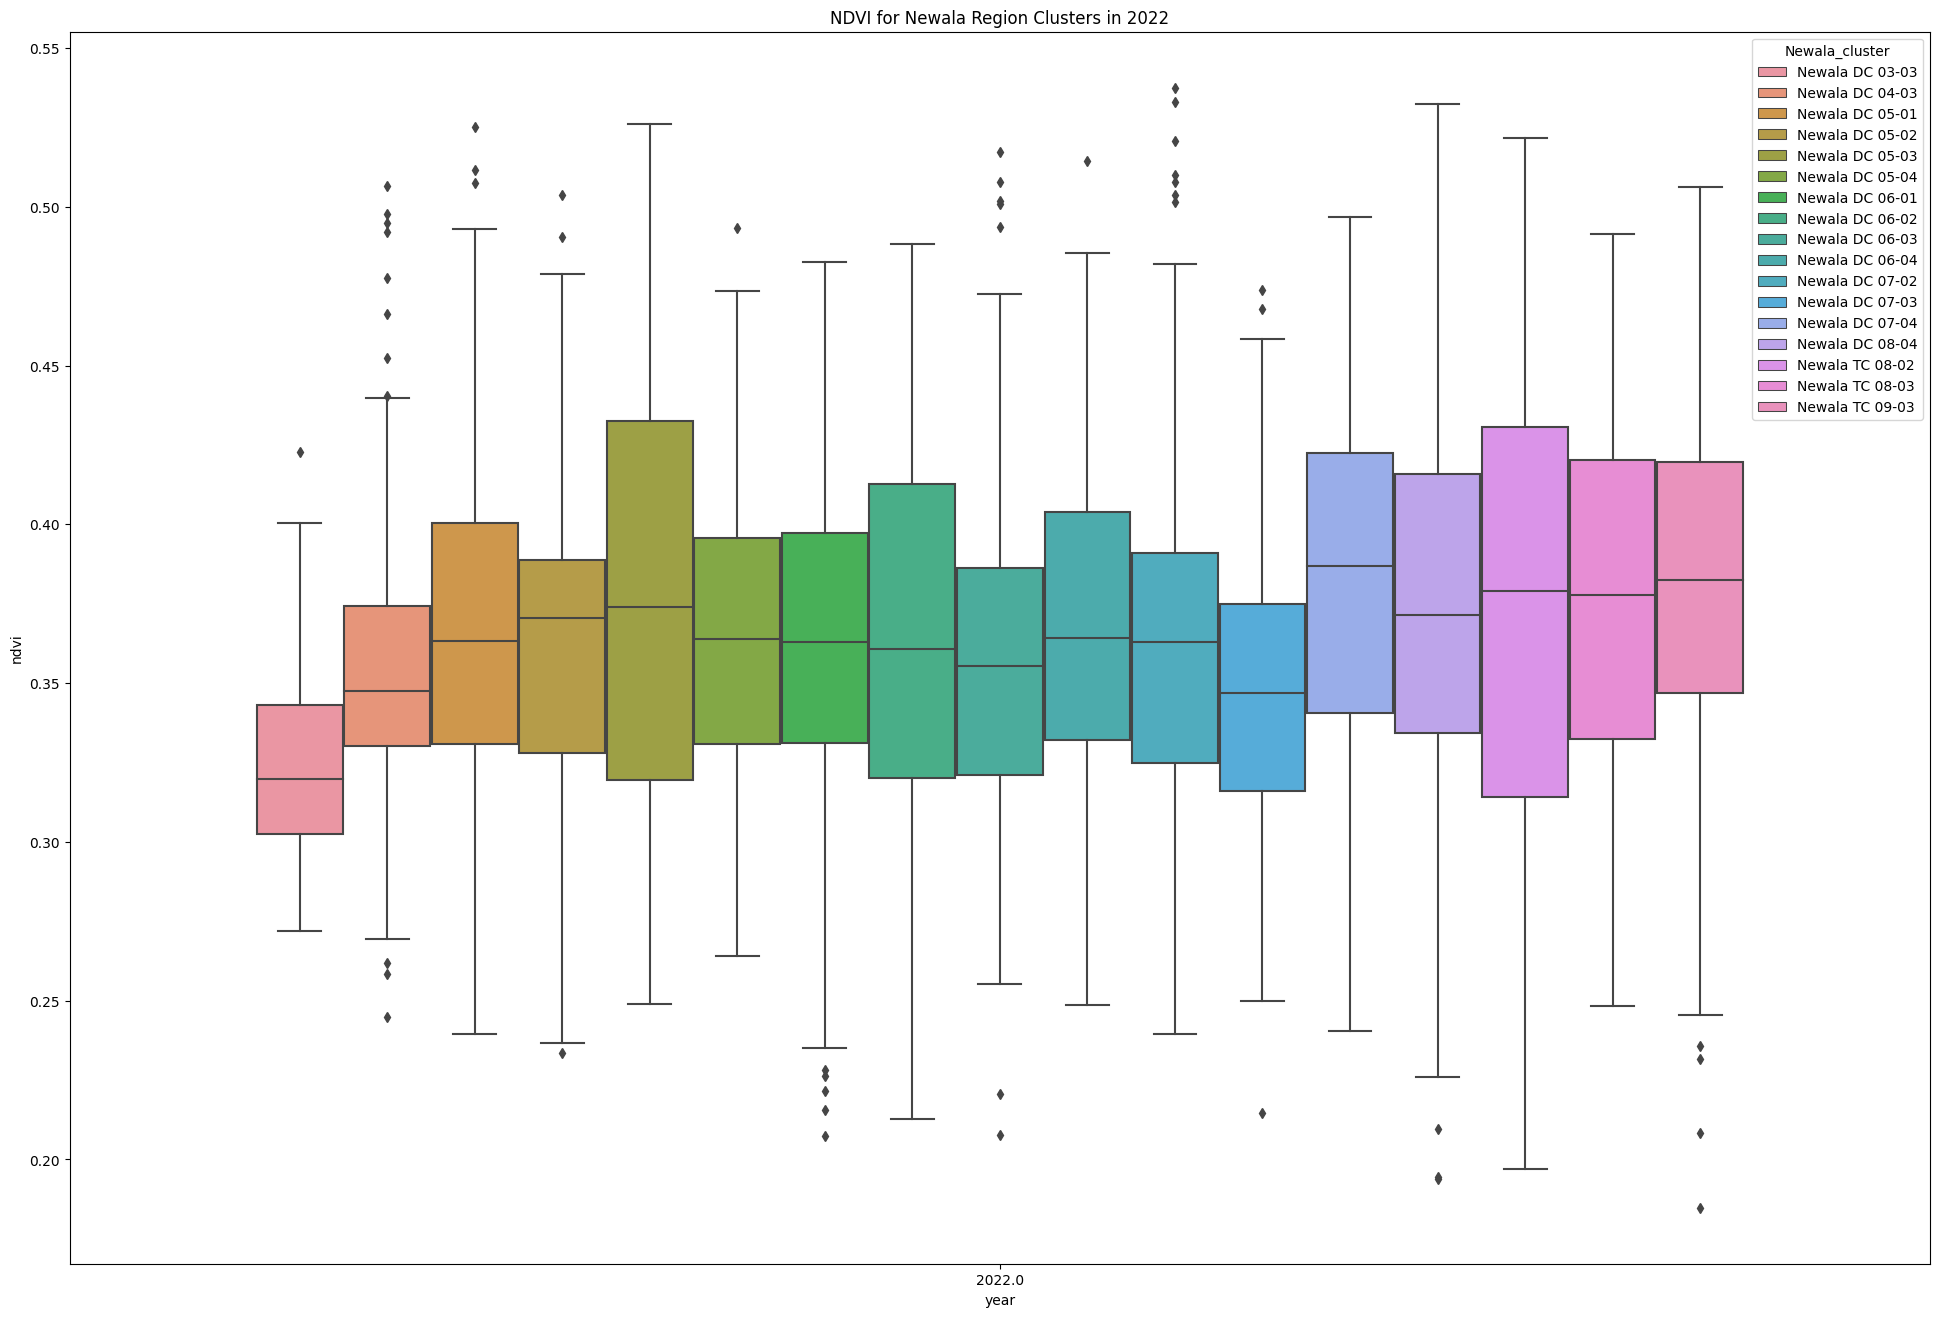

In [ ]:
#
plt.figure(figsize=(24, 16))

sns.boxplot(data=trees_df, x="year", y="ndvi", hue="Newala_cluster").set(title='NDVI for Newala Region Clusters in 2022')

[Text(0.5, 1.0, 'EVI for Newala Region Clusters in 2022')]

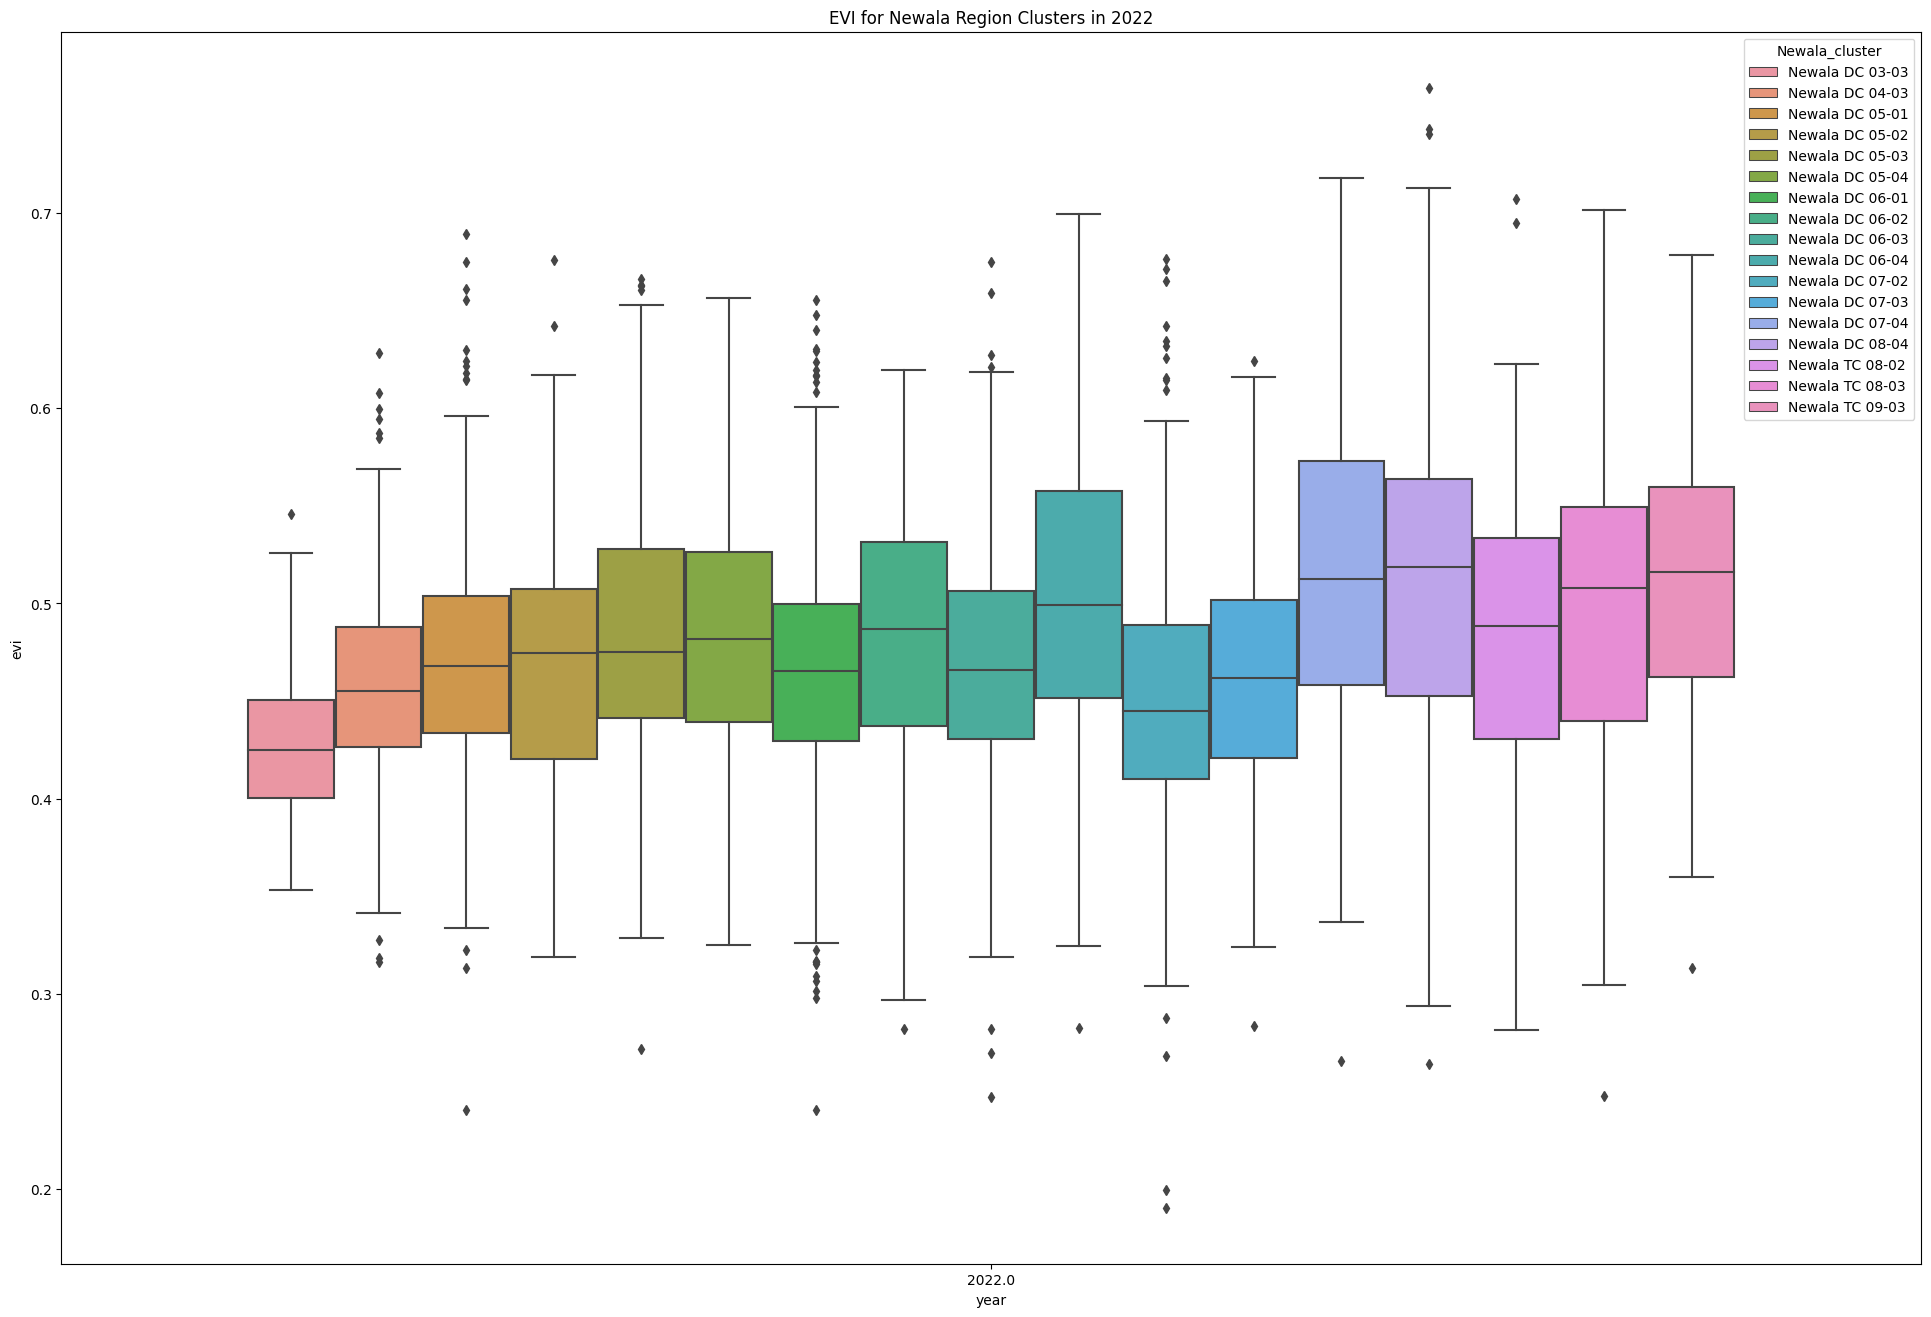

In [ ]:
#
plt.figure(figsize=(24, 16))

sns.boxplot(data=trees_df, x="year", y="evi", hue="Newala_cluster").set(title='EVI for Newala Region Clusters in 2022')

[Text(0.5, 1.0, 'NDVI for Newala Region Clusters in 2022')]

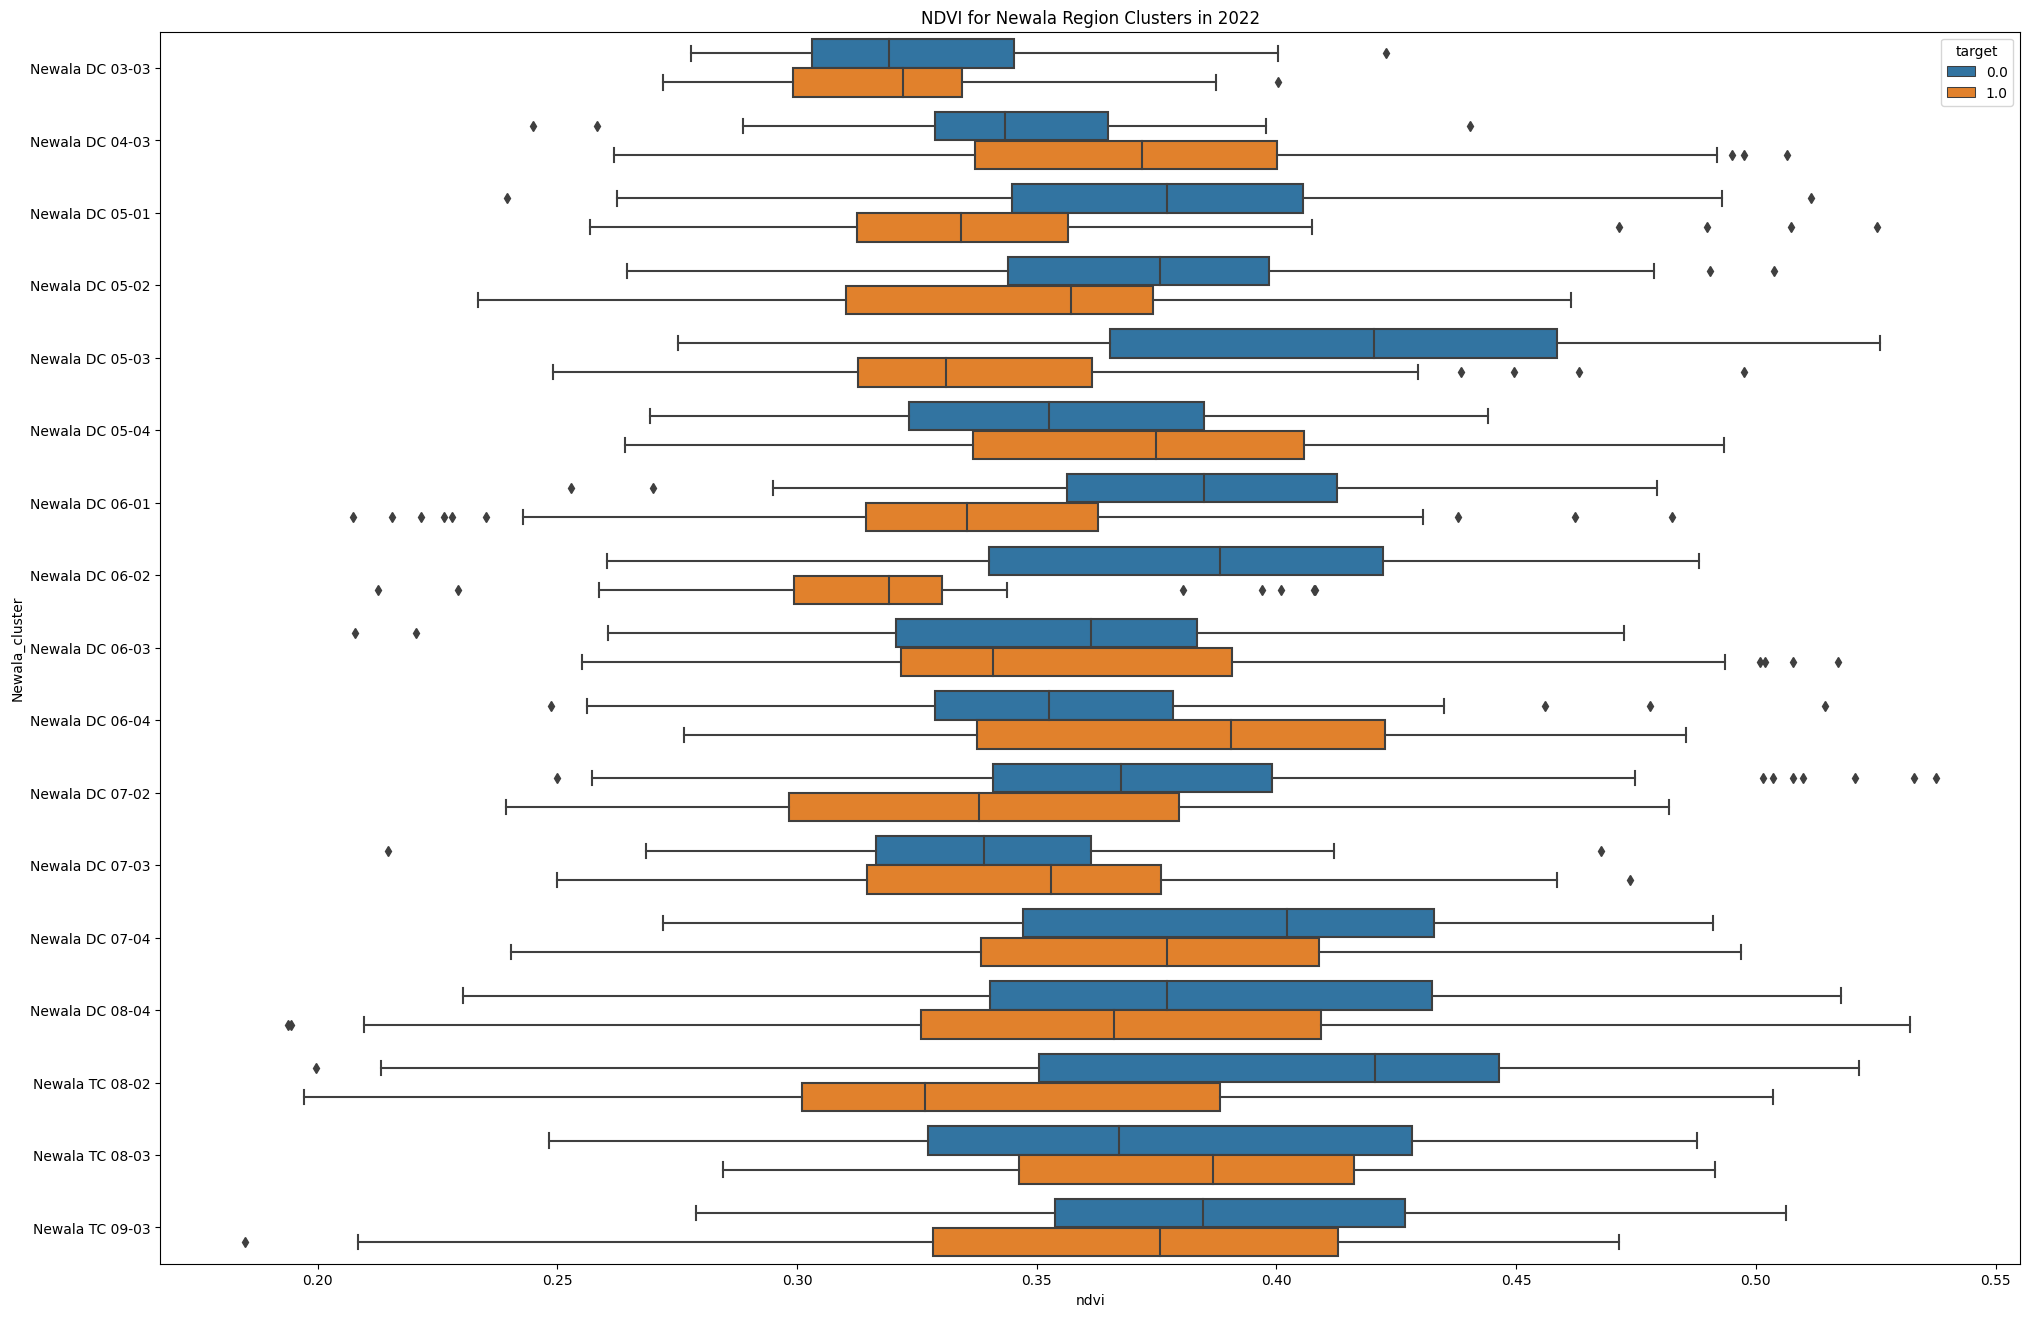

In [ ]:
#
plt.figure(figsize=(24, 16))

sns.boxplot(data=trees_df, x="ndvi", y="Newala_cluster", hue="target").set(title='NDVI for Newala Region Clusters in 2022')

[Text(0.5, 1.0, 'EVI for Newala Region by cluster in 2022')]

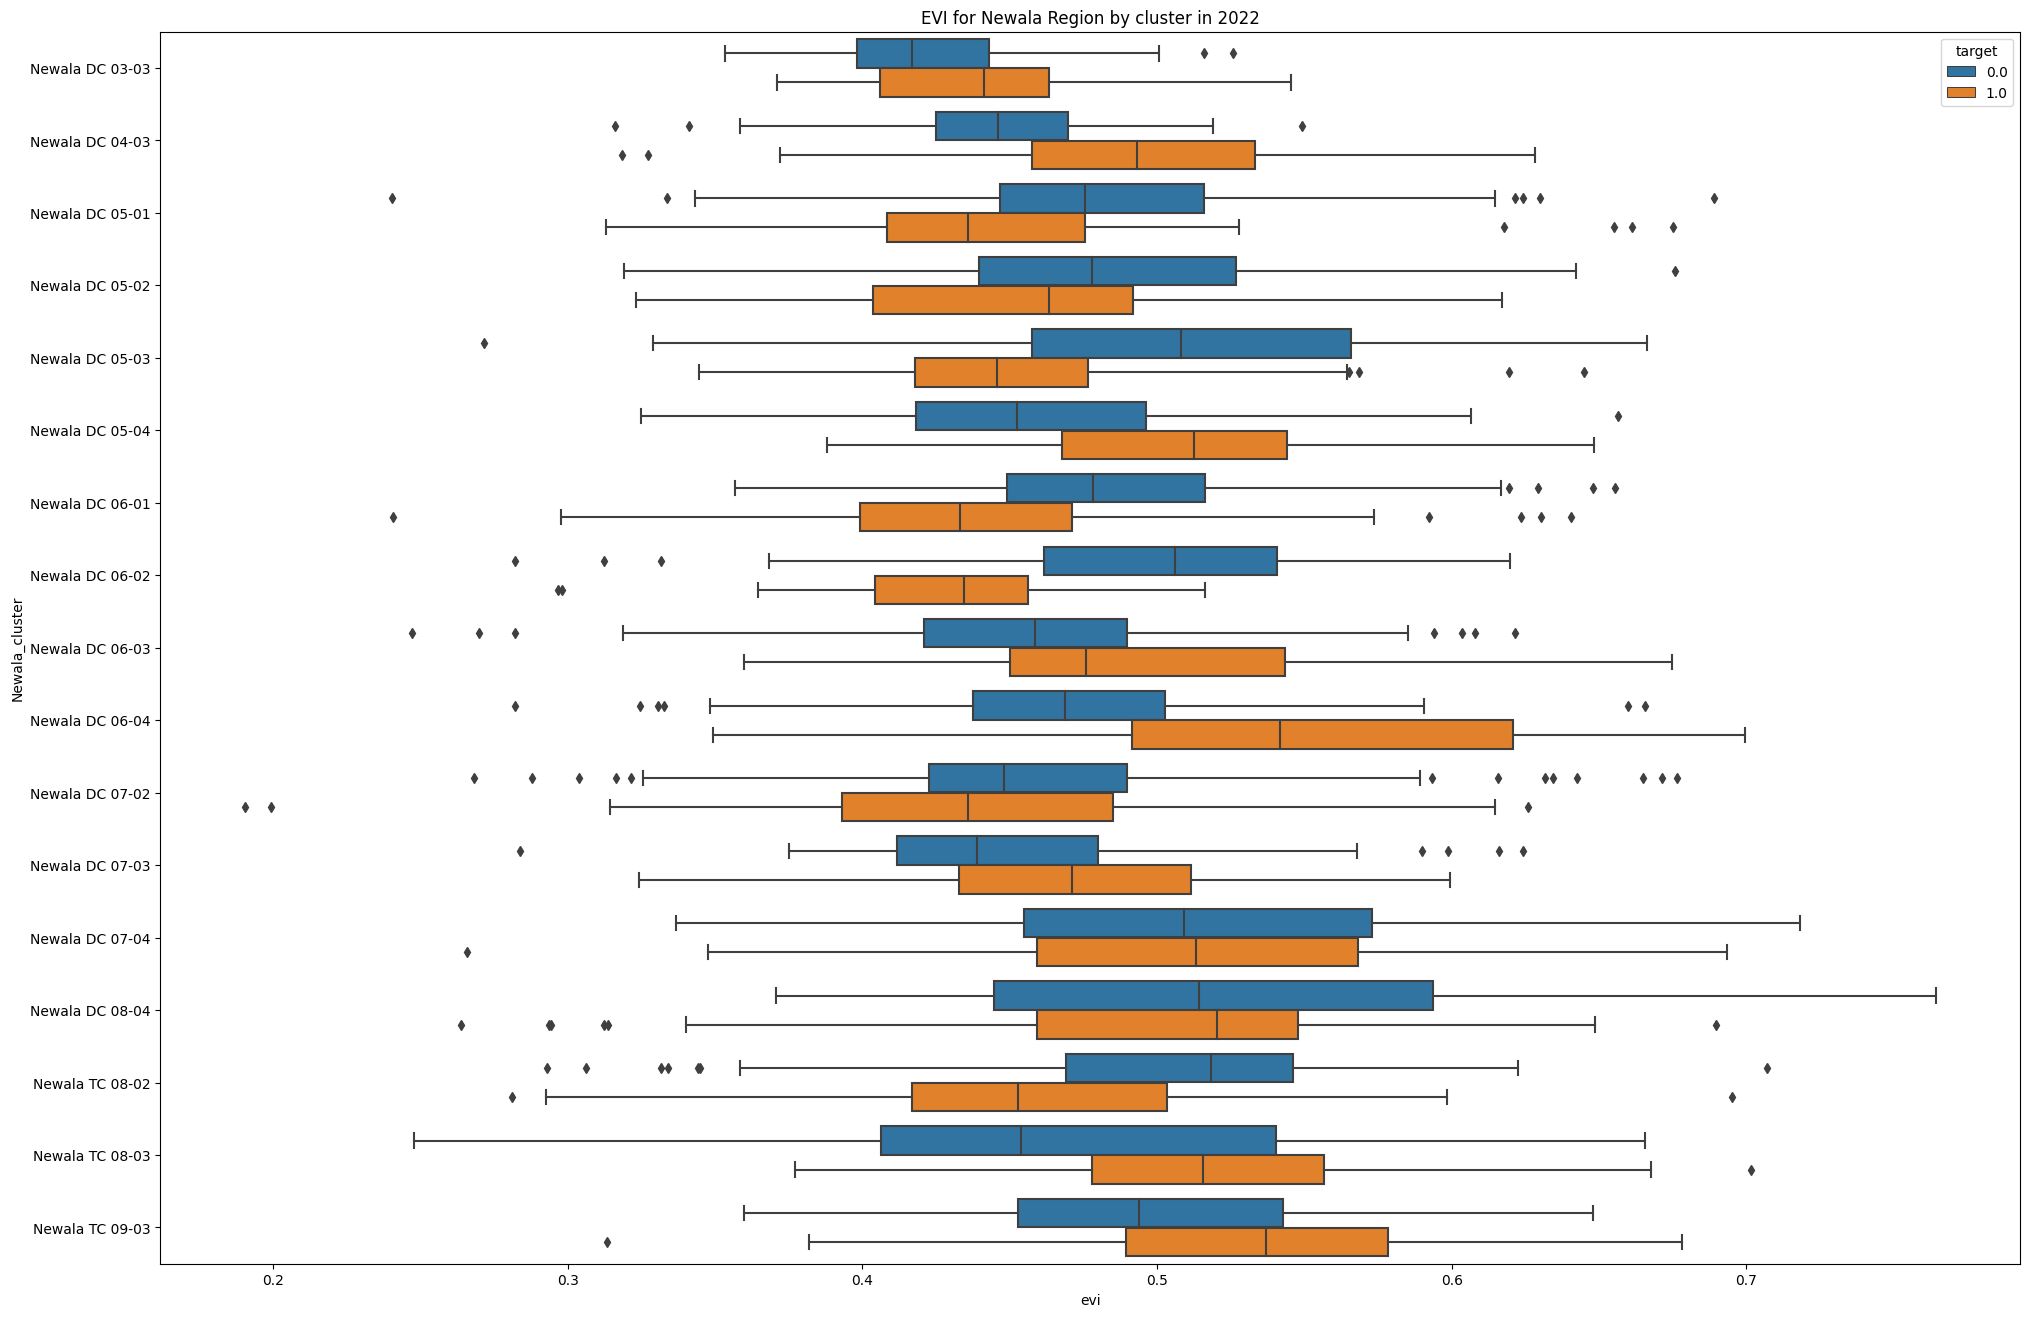

In [ ]:
# by month
plt.figure(figsize=(24, 16))

sns.boxplot(data=trees_df, x="evi", y="Newala_cluster", hue="target").set(title='EVI for Newala Region by cluster in 2022')

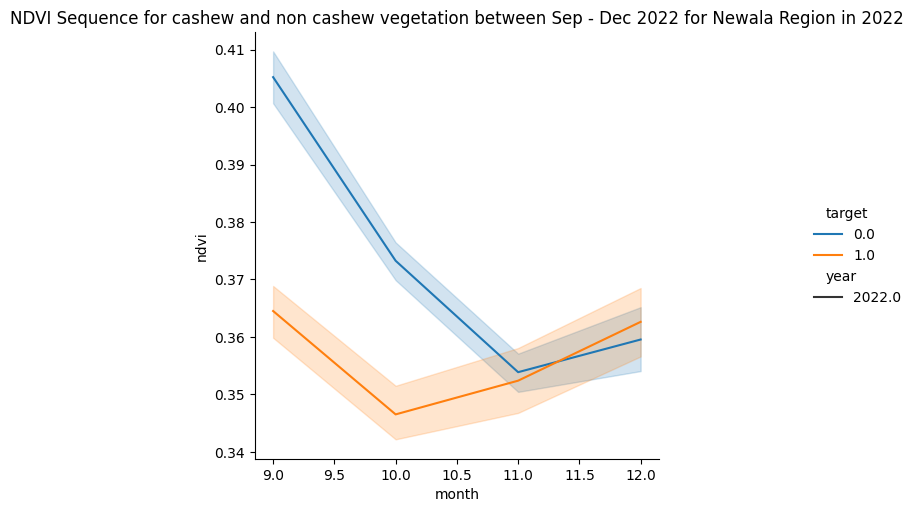

In [ ]:
sns.relplot(data=trees_df, x="month", y="ndvi", hue="target", kind="line", style= 'year').set(title='NDVI Sequence for cashew and non cashew vegetation between Sep - Dec 2022 for Newala Region in 2022')

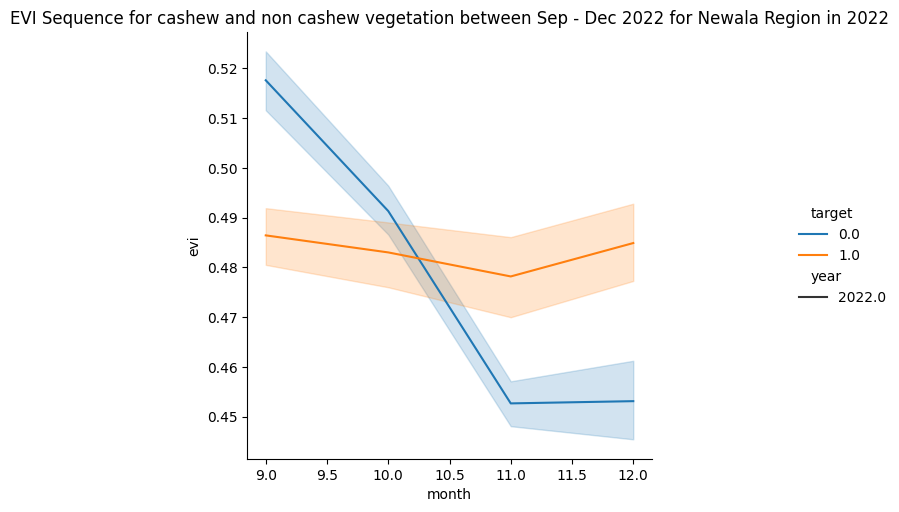

In [ ]:
sns.relplot(data=trees_df, x="month", y="evi", hue="target", kind="line", style= 'year').set(title='EVI Sequence for cashew and non cashew vegetation between Sep - Dec 2022 for Newala Region in 2022')

<Figure size 1800x1000 with 0 Axes>

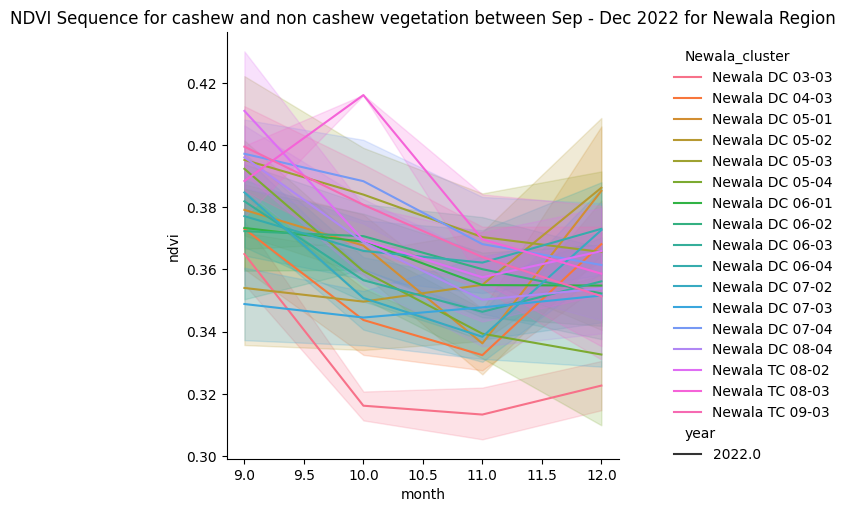

In [ ]:
plt.figure(figsize=(18, 10))
sns.relplot(data=trees_df, x="month", y="ndvi", hue="Newala_cluster", kind="line", style= 'year').set(title='NDVI Sequence for cashew and non cashew vegetation between Sep - Dec 2022 for Newala Region')

## Preparing Data For Modeling

In [ ]:
data_1 = trees_df.drop(['datetime', 'year', 'B1', 'month', 'day of year', 'Newala_cluster'], axis=1)

In [ ]:
from pycaret.classification import *
import pycaret.classification

In [ ]:
### Model

clf_data = data_1.sample(frac=0.95, random_state=78)
data_unseen = pd.concat([clf_data,data_1]).drop_duplicates(keep=False)
print('Data for Modeling: ' + str(clf_data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4020, 14)
Unseen Data For Predictions: (212, 14)


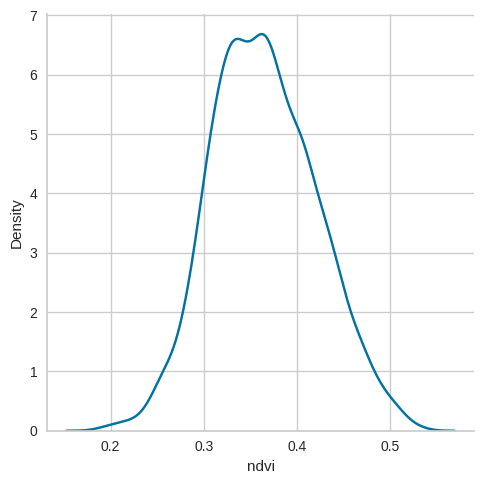

In [ ]:
sns.displot(clf_data, x="ndvi", kind="kde")

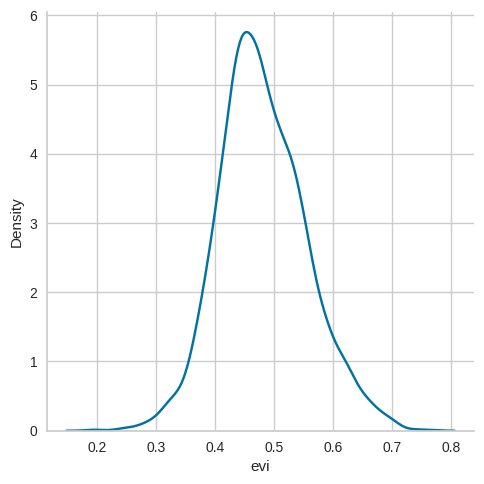

In [ ]:
sns.displot(clf_data, x="evi", kind="kde")

In [ ]:
classifier = setup(data = clf_data, target = 'target', remove_outliers = True)

,Description,Value
0,Session id,8592
1,Target,target
2,Target type,Binary
3,Original data shape,"(4020, 14)"
4,Transformed data shape,"(3879, 14)"
5,Transformed train set shape,"(2673, 14)"
6,Transformed test set shape,"(1206, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7729,0.8469,0.7565,0.7310,0.7432,0.5398,0.5405,0.7380
catboost,CatBoost Classifier,0.7665,0.8493,0.7418,0.7271,0.7341,0.5261,0.5265,9.3040
et,Extra Trees Classifier,0.7630,0.8446,0.7361,0.7239,0.7296,0.5187,0.5191,1.4990
xgboost,Extreme Gradient Boosting,0.7605,0.8404,0.7296,0.7224,0.7259,0.5133,0.5134,1.1990
rf,Random Forest Classifier,0.7559,0.8379,0.7230,0.7184,0.7203,0.5038,0.5042,1.1550
lda,Linear Discriminant Analysis,0.7516,0.8247,0.6805,0.7306,0.7041,0.4906,0.4920,0.1440
gbc,Gradient Boosting Classifier,0.7470,0.8290,0.7222,0.7043,0.7128,0.4868,0.4873,1.2480
knn,K Neighbors Classifier,0.7356,0.7933,0.6585,0.7121,0.6838,0.4573,0.4587,0.2060
qda,Quadratic Discriminant Analysis,0.7353,0.8163,0.7091,0.6913,0.6997,0.4631,0.4636,0.1490
ada,Ada Boost Classifier,0.7253,0.8001,0.6691,0.6914,0.6793,0.4393,0.4402,1.1410


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
lightgbm= create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8156,0.8605,0.8130,0.7752,0.7937,0.6272,0.6277
1,0.7695,0.8521,0.7317,0.7377,0.7347,0.5309,0.5310
2,0.7589,0.8196,0.7236,0.7236,0.7236,0.5097,0.5097
3,0.7411,0.8310,0.7561,0.6838,0.7181,0.4799,0.4820
4,0.7438,0.8313,0.6885,0.7119,0.7000,0.4765,0.4767
5,0.7900,0.8468,0.7787,0.7480,0.7631,0.5747,0.5751
6,0.7687,0.8560,0.7377,0.7317,0.7347,0.5297,0.5297
7,0.7758,0.8577,0.7541,0.7360,0.7449,0.5450,0.5451
8,0.7687,0.8440,0.7623,0.7209,0.7410,0.5323,0.5330


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_model = tune_model( lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7801,0.8539,0.7317,0.7563,0.7438,0.5513,0.5516
1,0.7589,0.8544,0.6829,0.7434,0.7119,0.5052,0.5065
2,0.7553,0.8022,0.6992,0.7288,0.7137,0.5002,0.5006
3,0.7340,0.7988,0.7561,0.6739,0.7126,0.4666,0.4693
4,0.7189,0.8201,0.6885,0.6720,0.6802,0.4294,0.4295
5,0.7224,0.8158,0.6885,0.6774,0.6829,0.4361,0.4362
6,0.7651,0.8432,0.7295,0.7295,0.7295,0.5220,0.5220
7,0.7544,0.8256,0.7623,0.6992,0.7294,0.5054,0.5070
8,0.7367,0.8129,0.6967,0.6967,0.6967,0.4640,0.4640


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


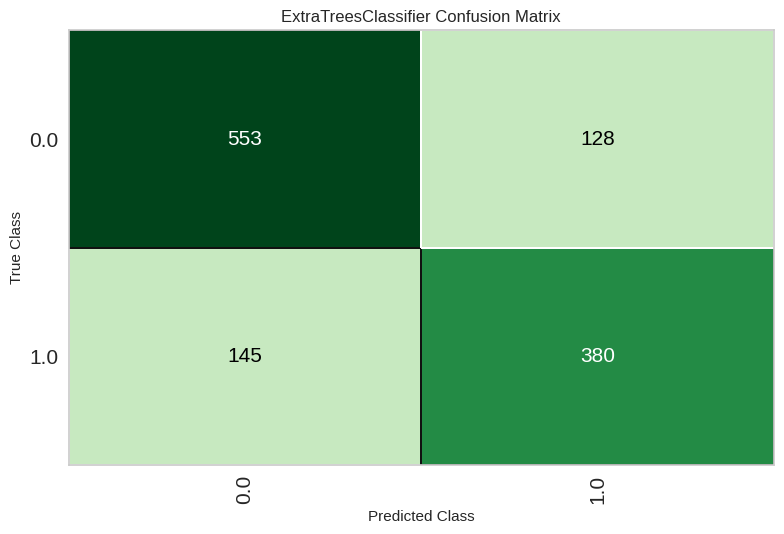

In [ ]:
plot_model(tuned_model, plot='confusion_matrix')

In [ ]:
predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7595,0.8564,0.7105,0.7299,0.7201,0.5094,0.5095


,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,ndvi,evi,target,prediction_label,prediction_score
704,0.379875,0.316850,0.150150,0.174750,0.170350,0.231600,0.316125,0.353625,0.355250,0.377625,0.371225,0.378256,0.461802,0.0,1,0.8963
3566,0.431200,0.333900,0.164175,0.180950,0.197825,0.252675,0.305600,0.337650,0.364550,0.374250,0.385125,0.308395,0.409334,1.0,1,0.9140
3626,0.443225,0.323975,0.180900,0.200550,0.211700,0.260925,0.350225,0.391025,0.398375,0.428150,0.428675,0.338282,0.487237,0.0,1,0.5046
3075,0.402650,0.281575,0.155050,0.178075,0.178425,0.236175,0.353100,0.390900,0.413025,0.428825,0.423450,0.412351,0.539103,0.0,1,0.6632
394,0.463075,0.339975,0.157675,0.181250,0.211950,0.264500,0.312250,0.345550,0.367125,0.393950,0.399475,0.300380,0.422853,1.0,1,0.7534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,0.409825,0.301950,0.156325,0.183800,0.196750,0.249700,0.336750,0.374075,0.385325,0.415350,0.373625,0.357131,0.487848,1.0,1,0.5598
524,0.000000,0.148900,0.140925,0.147975,0.139050,0.164725,0.210250,0.222950,0.246475,0.238000,0.260850,0.262432,0.240304,0.0,0,0.7607
582,0.000000,0.207775,0.150125,0.170975,0.158300,0.218100,0.323975,0.352025,0.385700,0.388325,0.360475,0.420810,0.499674,0.0,0,0.9228
3362,0.339100,0.241800,0.148625,0.165125,0.161300,0.209150,0.286325,0.320300,0.345250,0.360650,0.352550,0.381933,0.445495,0.0,0,0.8439


In [ ]:
final_model = finalize_model(tuned_model)

In [ ]:
predict_model(final_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9303,0.9818,0.9295,0.9121,0.9208,0.8586,0.8588


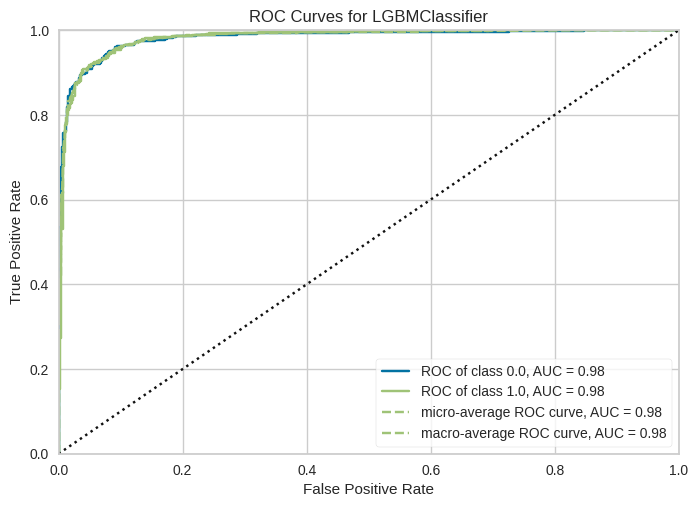

In [ ]:
plot_model(final_model)

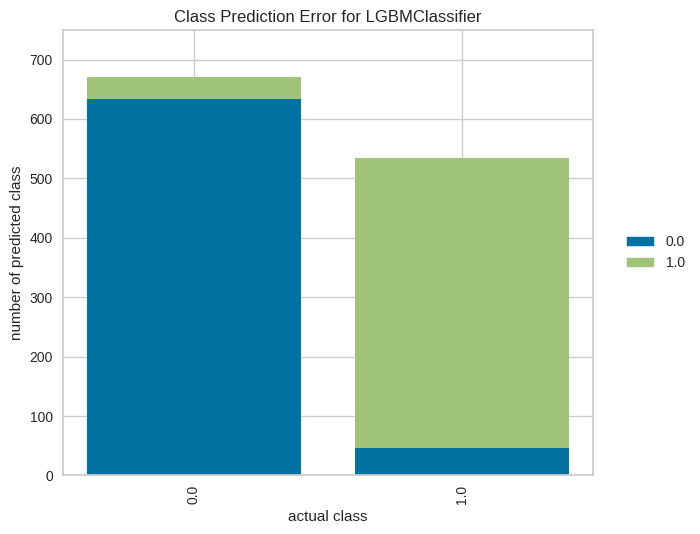

In [ ]:
plot_model(final_model, plot = 'error')

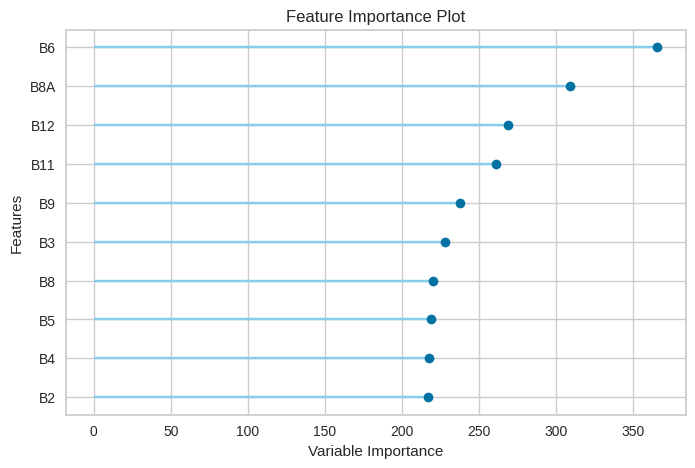

In [ ]:
plot_model(final_model, plot='feature')

In [ ]:
data_unseen

,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,ndvi,target,evi
23,0.425200,0.314875,0.167700,0.185075,0.203150,0.241725,0.307300,0.335725,0.344100,0.374325,0.401400,0.296420,1.0,0.400091
27,0.481875,0.335350,0.166325,0.197000,0.208200,0.274250,0.339350,0.367100,0.401125,0.417450,0.392150,0.334452,1.0,0.473352
66,0.429900,0.323875,0.174250,0.189150,0.203050,0.247950,0.297200,0.333200,0.329825,0.371050,0.352825,0.292632,0.0,0.393821
81,0.430000,0.306975,0.164000,0.179025,0.192250,0.235725,0.287650,0.317350,0.338525,0.366425,0.367925,0.311764,0.0,0.403912
101,0.391525,0.287675,0.150425,0.166275,0.181275,0.224500,0.261750,0.294200,0.311025,0.338925,0.341700,0.303057,0.0,0.369372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,0.376450,0.265200,0.150550,0.169750,0.177475,0.227750,0.302925,0.338125,0.356325,0.391975,0.391050,0.376679,0.0,0.476344
4192,0.400775,0.282100,0.153025,0.170500,0.183825,0.228350,0.272825,0.301975,0.316975,0.349175,0.358150,0.310225,0.0,0.385095
4194,0.364150,0.242375,0.177825,0.193100,0.171600,0.234400,0.371250,0.426250,0.446400,0.471675,0.452525,0.466480,0.0,0.617807
4209,0.359225,0.252350,0.184575,0.192725,0.183050,0.231125,0.310250,0.351175,0.362300,0.390550,0.414800,0.361750,0.0,0.464840


In [ ]:
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8113,0.9049,0.7685,0.8469,0.8058,0.6232,0.6260


,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,ndvi,evi,target,prediction_label,prediction_score
23,0.425200,0.314875,0.167700,0.185075,0.203150,0.241725,0.30730,0.335725,0.344100,0.374325,0.401400,0.296420,0.400091,1.0,1,0.5282
27,0.481875,0.335350,0.166325,0.197000,0.208200,0.274250,0.33935,0.367100,0.401125,0.417450,0.392150,0.334452,0.473352,1.0,1,0.6168
66,0.429900,0.323875,0.174250,0.189150,0.203050,0.247950,0.29720,0.333200,0.329825,0.371050,0.352825,0.292632,0.393821,0.0,1,0.7011
81,0.430000,0.306975,0.164000,0.179025,0.192250,0.235725,0.28765,0.317350,0.338525,0.366425,0.367925,0.311764,0.403912,0.0,0,0.9613
101,0.391525,0.287675,0.150425,0.166275,0.181275,0.224500,0.26175,0.294200,0.311025,0.338925,0.341700,0.303057,0.369372,0.0,0,0.9798


In [ ]:
#from pycaret.utils import check_metric
#from pycaret.utils.generic import check_metric
#check_metric(unseen_predictions['target'], unseen_predictions['Label'], metric = 'Recall')


In [ ]:
#check_metric(unseen_predictions['target'], unseen_predictions['Label'], metric = 'Accuracy')

In [ ]:
#check_metric(unseen_predictions['target'], unseen_predictions['Label'], metric = 'Precision')

In [ ]:
#check_metric(unseen_predictions['target'], unseen_predictions['Label'], metric = 'F1')